# Tesco Customer Analysis

Yu Qiu   
Date: 05/18/2023  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load the dataset
df = pd.read_csv('/Users/qiuyu/Desktop/ALY6040/M3/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#check structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#check top rows
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

# EDA

In [5]:
#Check missing value

df.isnull().sum()/len(df)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [6]:
#check unique values in each column
for x in df.columns.to_list() : 
    print(x + '=')
    print(df[x].sort_values().unique())
    print('')

customerID=
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

gender=
['Female' 'Male']

SeniorCitizen=
[0 1]

Partner=
['No' 'Yes']

Dependents=
['No' 'Yes']

tenure=
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]

PhoneService=
['No' 'Yes']

MultipleLines=
['No' 'No phone service' 'Yes']

InternetService=
['DSL' 'Fiber optic' 'No']

OnlineSecurity=
['No' 'No internet service' 'Yes']

OnlineBackup=
['No' 'No internet service' 'Yes']

DeviceProtection=
['No' 'No internet service' 'Yes']

TechSupport=
['No' 'No internet service' 'Yes']

StreamingTV=
['No' 'No internet service' 'Yes']

StreamingMovies=
['No' 'No internet service' 'Yes']

Contract=
['Month-to-month' 'One year' 'Two year']

PaperlessBilling=
['No' 'Yes']

PaymentMethod=
['Bank transfer (automatic)' 'Credit card (a

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', None)

In [8]:
#Check missing value

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

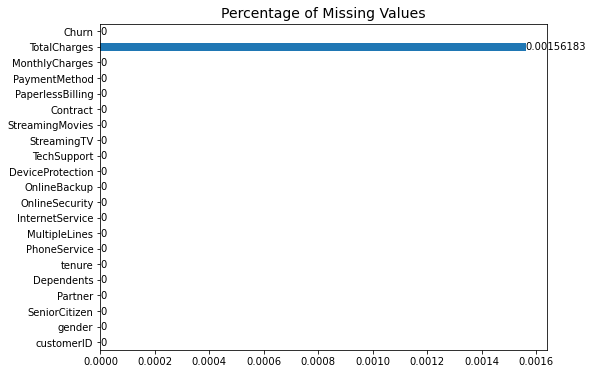

In [9]:
#Check the missing value
percent = df.isnull().sum()/len(df)

#plot the missing percentage
fig, ax = plt.subplots(figsize=(8,6))
percent.plot.barh()
plt.title("Percentage of Missing Values", size=14)
ax.bar_label(ax.containers[0])
plt.show()

In [10]:
#Convert int to string
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [11]:
# Check Duplicate 
df.duplicated().sum()

0

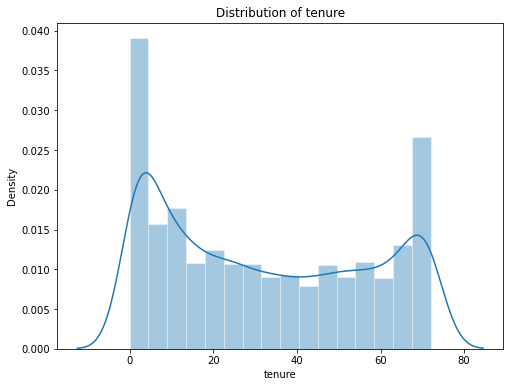

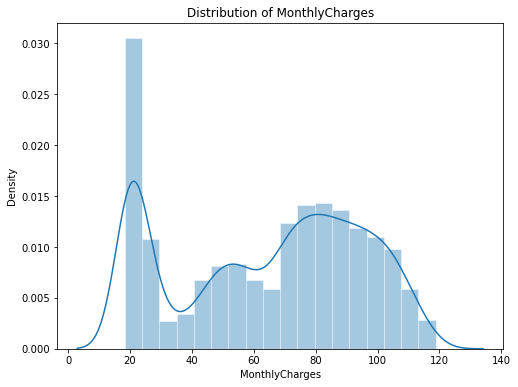

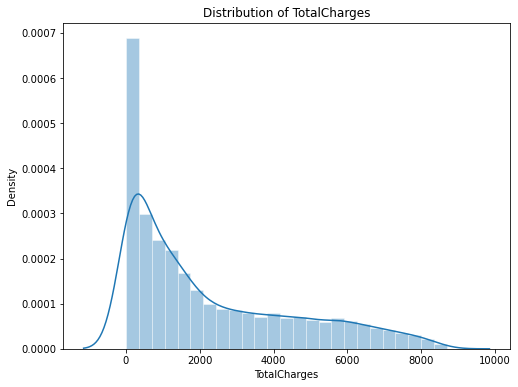

In [12]:
#distribution of numeric

numerics = ['tenure', 'MonthlyCharges', 'TotalCharges']
nume = df[numerics]

for i in range(0,len(numerics)):
    fig, ax = plt.subplots(figsize=(8,6))
    sns.histplot(df[numerics[i]],kde=True,stat="density",kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4),palette="Set2")
    plt.title(f'Distribution of {numerics[i]}')
    plt.show()

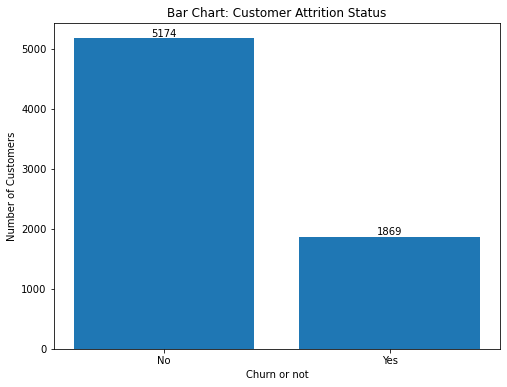

In [13]:
churn_df = df.groupby('Churn')['customerID'].count().reset_index()
churn_df.columns = ['Churn', 'Count']
churn = churn_df['Churn']
count = churn_df['Count']
#set the size of the plot
fig, ax = plt.subplots(figsize=(8,6))

# Create bars with different colors
bar_container = plt.bar(churn, count)

plt.xlabel("Churn or not")
plt.ylabel("Number of Customers")
plt.title("Bar Chart: Customer Attrition Status")
plt.bar_label(bar_container)
plt.show()

In [14]:
df_new = df
#replace 1, 0 to yes and no
df_new['SeniorCitizen'] = df_new['SeniorCitizen'].replace({0 : "No", 1: "Yes"})
#drop ID
df_new=df_new.drop(['customerID'], axis =1)

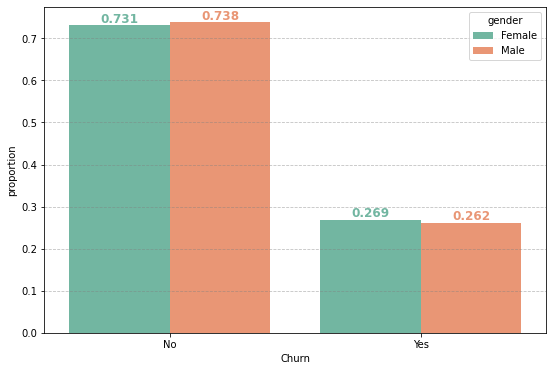

In [15]:
frequency = df_new.groupby('gender', as_index=False)['Churn'].value_counts(normalize=True).reset_index()
fig = plt.figure(figsize = (9, 6))
# plot with seaborn barplot
ax=sns.barplot(data=frequency, x='Churn', y='proportion', hue='gender',palette="Set2")
plt.grid(which = "major", axis = "y", linestyle = "--", color = "grey", alpha = 0.5)
# For each bar in the chart, add a text label.
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = round(bar.get_height(),3)
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12, weight = "bold")

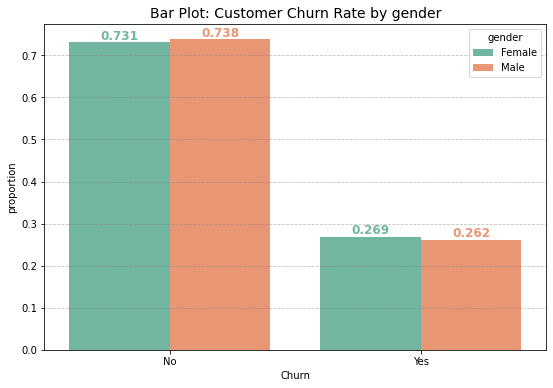

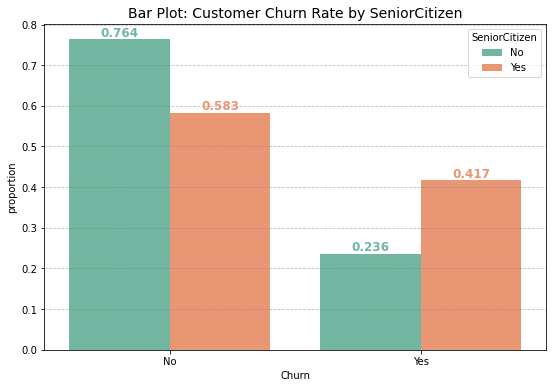

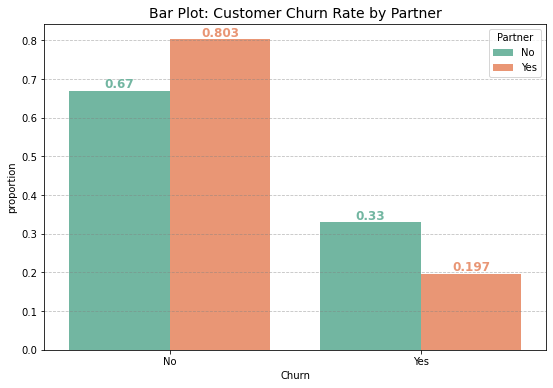

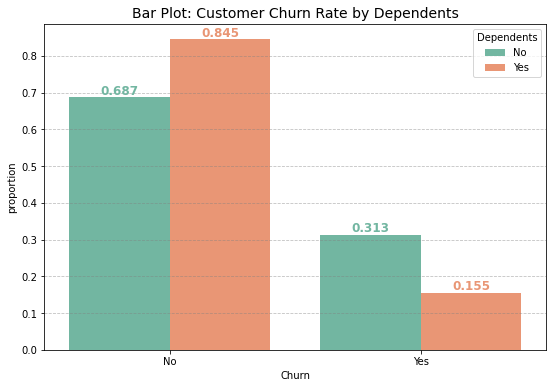

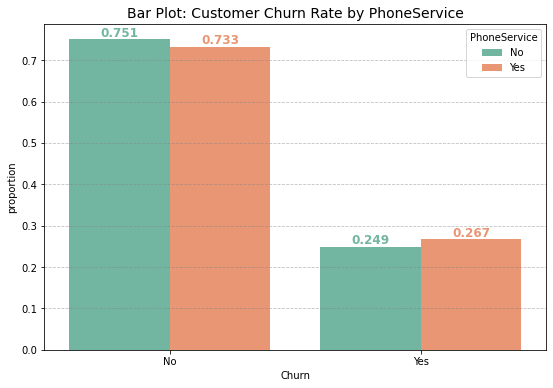

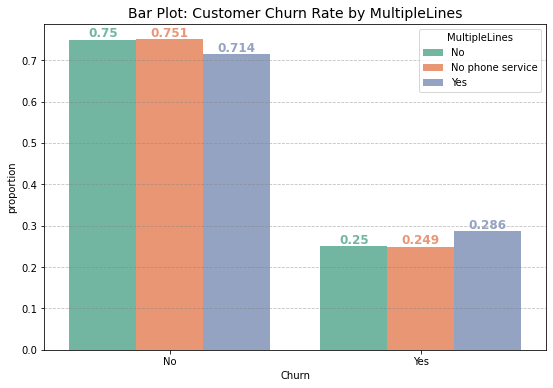

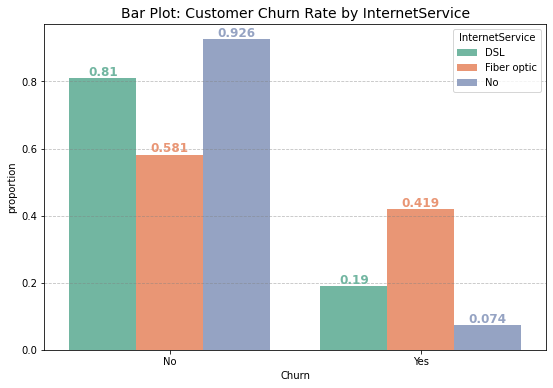

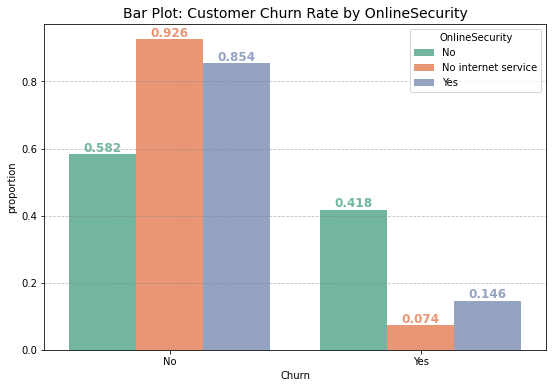

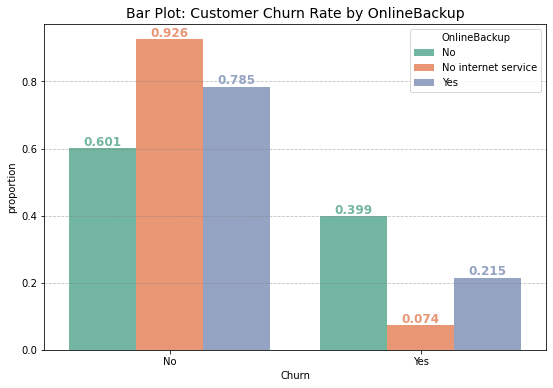

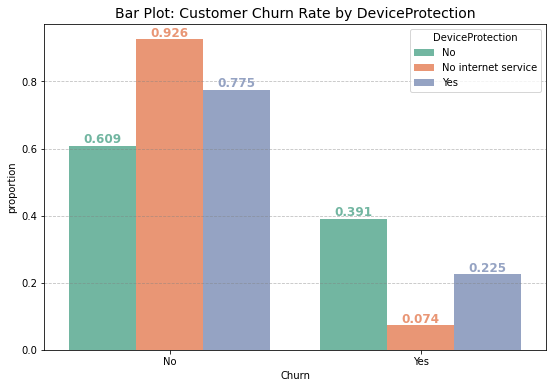

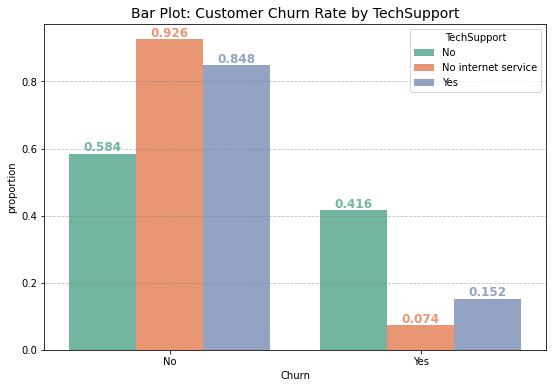

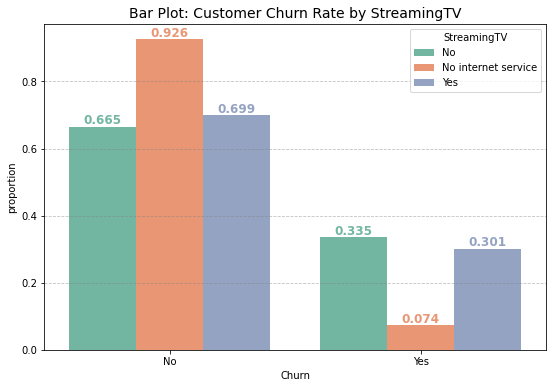

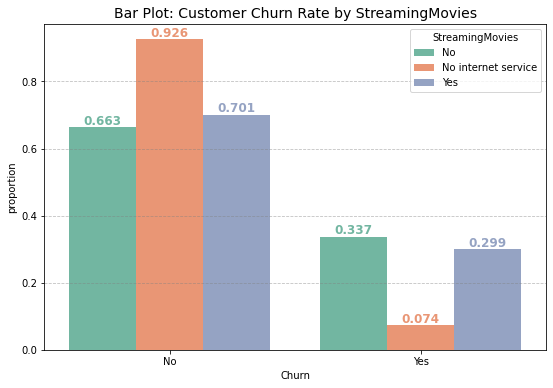

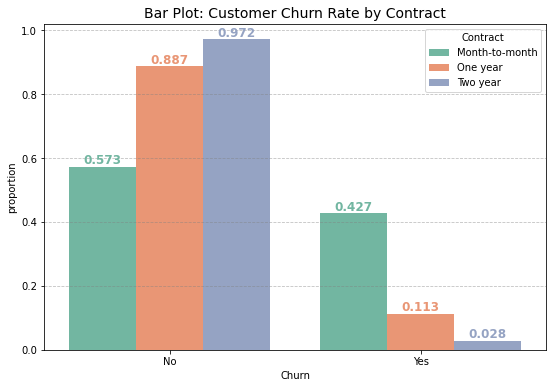

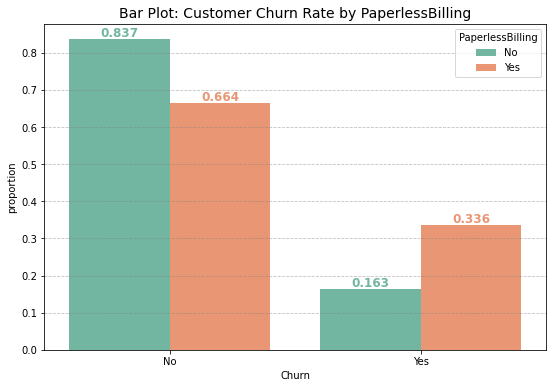

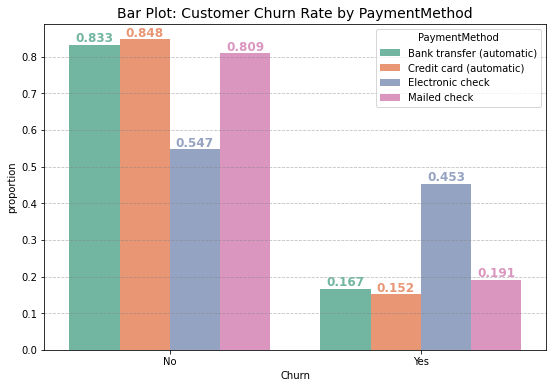

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


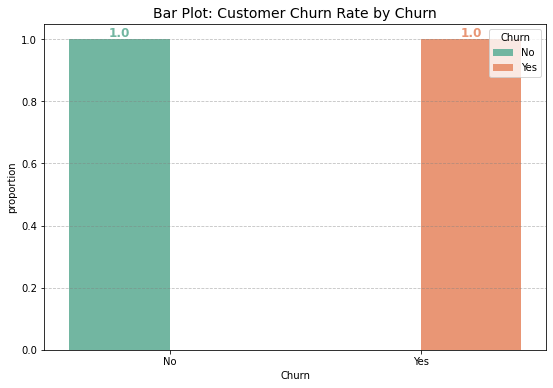

In [16]:
categorical = df_new[df_new.columns[df_new.dtypes == object]]
columns = categorical.columns

for i in columns:
    frequency = df_new.groupby(i, as_index=False)['Churn'].value_counts(normalize=True).reset_index()
    fig = plt.figure(figsize = (9, 6))
    ax=sns.barplot(data=frequency, x='Churn', y='proportion', hue=i,palette="Set2")
    plt.grid(which = "major", axis = "y", linestyle = "--", color = "grey", alpha = 0.5)
    # For each bar in the chart, add a text label.
    for bar in ax.patches:          
        bar_value = round(bar.get_height(),3)
        text = f'{bar_value:,}'
        text_x = bar.get_x() + bar.get_width() / 2
        text_y = bar.get_y() + bar_value
        bar_color = bar.get_facecolor()
        ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, size=12, weight = "bold")
    plt.title(f'Bar Plot: Customer Churn Rate by {i}', size =14)

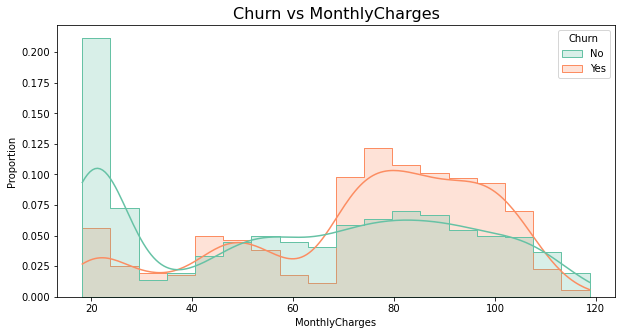

In [17]:
#Monthly Charges by Churn
plt.figure(figsize = (10,5))
plt.title('Churn vs MonthlyCharges', fontsize = 16)
sns.histplot(x='MonthlyCharges', hue = 'Churn', data = df, stat = 'proportion', common_norm = False, kde=True, element="step",palette="Set2")
plt.show()

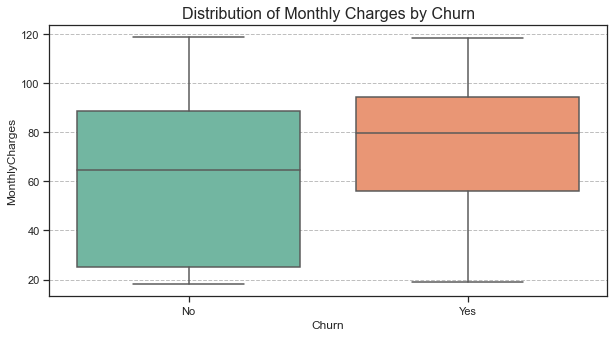

In [18]:
#Monthly Charges by Churn
plt.figure(figsize = (10,5))
sns.set_theme(style="ticks", palette="Set2")
plt.grid(which = "major", axis = "y", linestyle = "--", color = "grey", alpha = 0.5)
plt.title('Distribution of Monthly Charges by Churn', fontsize = 16)
sns.boxplot(x="Churn",y = 'MonthlyCharges', data = df_new,palette="Set2")
plt.show()

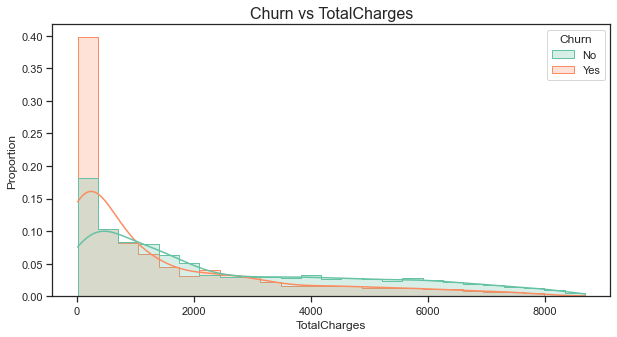

In [19]:
#Total Charges by CHurn
plt.figure(figsize = (10,5))
plt.title('Churn vs TotalCharges', fontsize = 16)
sns.histplot(x='TotalCharges', hue = 'Churn', data = df, stat = 'proportion', common_norm = False, kde=True, element="step",palette="Set2")
plt.show()

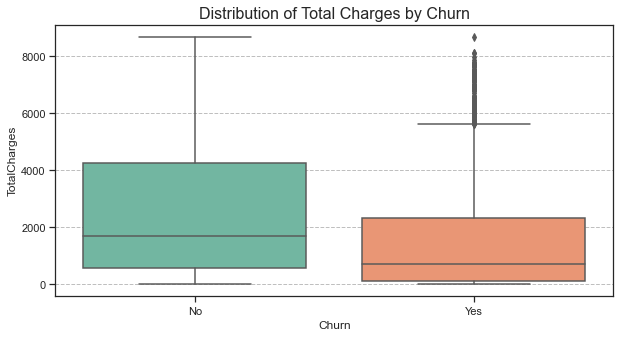

In [20]:
#Monthly Charges by Churn
plt.figure(figsize = (10,5))
sns.set_theme(style="ticks", palette="Set2")
plt.grid(which = "major", axis = "y", linestyle = "--", color = "grey", alpha = 0.5)

plt.title('Distribution of Total Charges by Churn', fontsize = 16)
sns.boxplot(x="Churn",y = 'TotalCharges', data = df_new,palette="Set2")
plt.show()

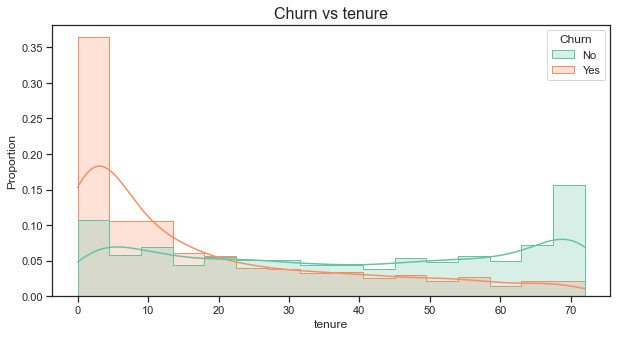

In [21]:
#Tenure by Churn
plt.figure(figsize = (10,5))
plt.title('Churn vs tenure', fontsize = 16)
sns.histplot(x='tenure', hue = 'Churn', data = df, stat = 'proportion', common_norm = False, kde=True, element="step",palette="Set2")
plt.show()

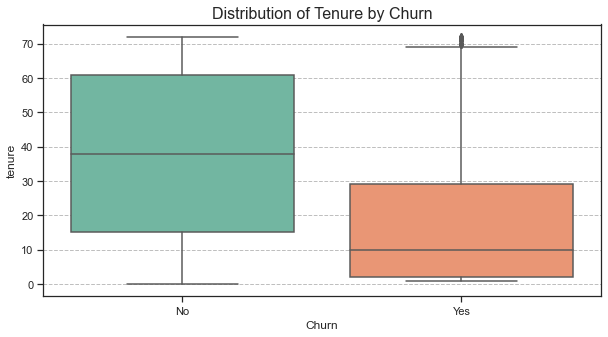

In [22]:
#Monthly Charges by Churn
plt.figure(figsize = (10,5))
sns.set_theme(style="ticks", palette="Set2")
plt.grid(which = "major", axis = "y", linestyle = "--", color = "grey", alpha = 0.5)

plt.title('Distribution of Tenure by Churn', fontsize = 16)
sns.boxplot(x="Churn",y = 'tenure', data = df_new,palette="Set2")
plt.show()

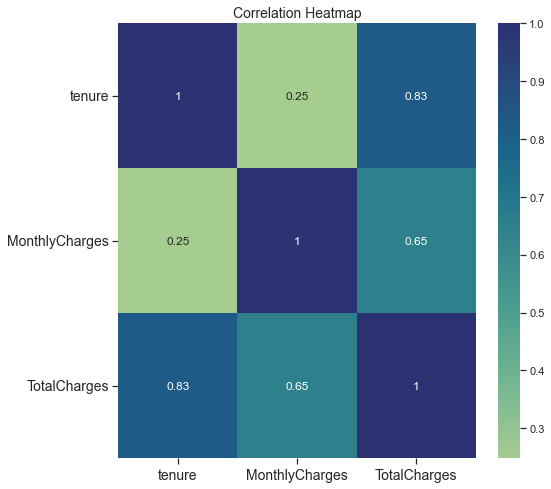

In [23]:
#create correlation matrix
plt.figure(figsize = (8,8))

matrix = nume.corr()
sns.heatmap(matrix, annot=True,cmap="crest")
plt.yticks(rotation = 360, size = 14)
plt.xticks(rotation = 0, size = 14)
plt.title('Correlation Heatmap', fontsize = 14)
plt.show()

# Hypothesis Tests

### Chi-Sqaure Tests

In [24]:
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=categorical['Churn'],columns=categorical['gender'])
print(CrosstabResult)

gender  Female  Male
Churn               
No        2549  2625
Yes        939   930


In [25]:
#Chi-Squre
from scipy.stats import chi2_contingency
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
# P-Value is the Probability of H0 being True
# If P-Value>0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.48657873605618596


In [26]:
columns = categorical.columns
for col in columns:
    crosstab = pd.crosstab(index=categorical['Churn'],columns=categorical[col])
    print(col, "vs Churn:", 'The P-Value of the ChiSq Test is:'+ '{:.20f}'.format(chi2_contingency(crosstab)[1]))

gender vs Churn: The P-Value of the ChiSq Test is:0.48657873605618595647
SeniorCitizen vs Churn: The P-Value of the ChiSq Test is:0.00000000000000000000
Partner vs Churn: The P-Value of the ChiSq Test is:0.00000000000000000000
Dependents vs Churn: The P-Value of the ChiSq Test is:0.00000000000000000000
PhoneService vs Churn: The P-Value of the ChiSq Test is:0.33878253580669281941
MultipleLines vs Churn: The P-Value of the ChiSq Test is:0.00346438295487729985
InternetService vs Churn: The P-Value of the ChiSq Test is:0.00000000000000000000
OnlineSecurity vs Churn: The P-Value of the ChiSq Test is:0.00000000000000000000
OnlineBackup vs Churn: The P-Value of the ChiSq Test is:0.00000000000000000000
DeviceProtection vs Churn: The P-Value of the ChiSq Test is:0.00000000000000000000
TechSupport vs Churn: The P-Value of the ChiSq Test is:0.00000000000000000000
StreamingTV vs Churn: The P-Value of the ChiSq Test is:0.00000000000000000000
StreamingMovies vs Churn: The P-Value of the ChiSq Test 

### ANOVA Tests

In [27]:
import pingouin as pg #ANOVA package

numechurn = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

numec = df_new[numechurn]
col_num = numec.drop(['Churn'], axis = 1).columns

anova_df=[]
for col in col_num:
    ano = pg.welch_anova(dv=col, between='Churn', data=numec)
    p = ano.iloc[0]['p-unc']
    print(col, "vs Churn:", 'The P-Value of the Anova Test is:'+ '{:.20f}'.format(p))

tenure vs Churn: The P-Value of the Anova Test is:0.00000000000000000000
MonthlyCharges vs Churn: The P-Value of the Anova Test is:0.00000000000000000000
TotalCharges vs Churn: The P-Value of the Anova Test is:0.00000000000000000000


# Data cleaning

In [28]:
df_new.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [29]:
#remove null
df_new_clean = df_new.dropna(axis =0)

In [30]:
df_new_clean.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [31]:
df_new_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [32]:
df_new = df_new_clean.drop(['gender', 'PhoneService'], axis =1)

In [33]:
#drop ID
df=df.drop(['customerID'], axis =1)

In [34]:
df_knn = df

In [35]:
#Encode Categorical
cat_variables = categorical.columns
df_knn_dummies = pd.get_dummies(df_knn, drop_first=True)
df_knn_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   gender_Male                            7043 non-null   uint8  
 4   SeniorCitizen_Yes                      7043 non-null   uint8  
 5   Partner_Yes                            7043 non-null   uint8  
 6   Dependents_Yes                         7043 non-null   uint8  
 7   PhoneService_Yes                       7043 non-null   uint8  
 8   MultipleLines_No phone service         7043 non-null   uint8  
 9   MultipleLines_Yes                      7043 non-null   uint8  
 10  InternetService_Fiber optic            7043 non-null   uint8  
 11  Inte

In [36]:
#normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_knn_dummies = pd.DataFrame(scaler.fit_transform(df_knn_dummies), columns = df_knn_dummies.columns)
df_knn_dummies.head()

tenure  MonthlyCharges  TotalCharges  gender_Male  SeniorCitizen_Yes  \
0  0.013889        0.115423      0.001275          0.0                0.0   
1  0.472222        0.385075      0.215867          1.0                0.0   
2  0.027778        0.354229      0.010310          1.0                0.0   
3  0.625000        0.239303      0.210241          1.0                0.0   
4  0.027778        0.521891      0.015330          0.0                0.0   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0          1.0             0.0               0.0   
1          0.0             0.0               1.0   
2          0.0             0.0               1.0   
3          0.0             0.0               0.0   
4          0.0             0.0               1.0   

   MultipleLines_No phone service  MultipleLines_Yes  ...  StreamingTV_Yes  \
0                             1.0                0.0  ...              0.0   
1                             0.0                0.0  ...              0.0   
2                             0.0                0.0  ...              0.0   
3                             1.0                0.0  ...              0.0   
4                             0.0                0.0  ...              0.0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                  0.0                  0.0   
1                                  0.0                  0.0   
2                                  0.0                  0.0   
3                                  0.0                  0.0   
4                                  0.0                  0.0   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                0.0                0.0                   1.0   
1                1.0                0.0                   0.0   
2                0.0                0.0                   1.0   
3                1.0                0.0                   0.0   
4                0.0                0.0                   1.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  Churn_Yes  
0                         0.0        0.0  
1                         1.0        0.0  
2                         1.0        1.0  
3                         0.0        0.0  
4                         0.0        1.0  

[5 rows x 31 columns]

In [37]:
#impute missing values with KNN, n=3
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df_knn_dummies)
df_imputed = pd.DataFrame(imputed, columns=df_knn_dummies.columns)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   float64
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7043 non-null   float64
 3   gender_Male                            7043 non-null   float64
 4   SeniorCitizen_Yes                      7043 non-null   float64
 5   Partner_Yes                            7043 non-null   float64
 6   Dependents_Yes                         7043 non-null   float64
 7   PhoneService_Yes                       7043 non-null   float64
 8   MultipleLines_No phone service         7043 non-null   float64
 9   MultipleLines_Yes                      7043 non-null   float64
 10  InternetService_Fiber optic            7043 non-null   float64
 11  Inte

# PCA

In [38]:
#PCA Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
# project the original data into the PCA space
pca_df = pca.fit_transform(df_imputed)
pca_df

array([[-2.03041741e-01, -6.77334188e-01,  9.47053049e-01, ...,
         5.74977282e-17,  8.84813724e-17, -7.20307618e-17],
       [ 3.40710246e-02, -6.13013917e-02,  1.25032850e+00, ...,
        -3.50448627e-16,  5.26540665e-16, -9.49607807e-16],
       [-1.31373885e-01, -7.89505421e-01,  1.01026071e+00, ...,
         2.13412764e-16,  2.10834467e-16,  1.65229426e-17],
       ...,
       [-1.16975344e-01, -3.51180081e-01,  1.14435367e+00, ...,
         7.24480006e-18,  1.74531052e-18, -2.39519293e-17],
       [-3.24120647e-01, -9.85129654e-01, -3.77608337e-01, ...,
         7.89249232e-18,  7.56016978e-18,  1.62561070e-17],
       [-1.17137877e+00,  7.54086506e-01,  1.57294562e-02, ...,
        -8.52231196e-18, -1.64879882e-17,  8.27601323e-18]])

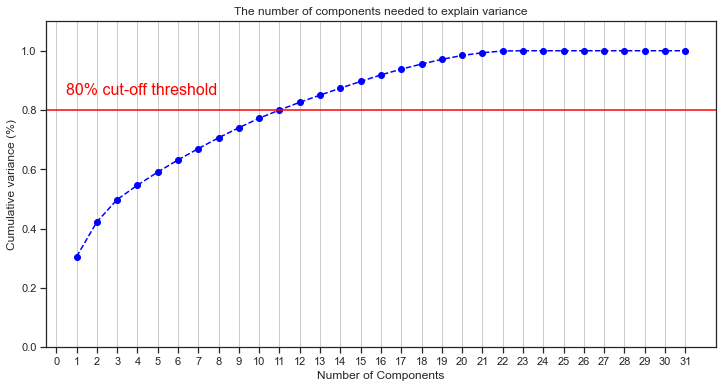

In [39]:
#plot the cumulative variance with number of components
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 32, step=1)
y = np.cumsum(pca.explained_variance_ratio_) #cumulatice variance ratio

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 32, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [40]:
pca.explained_variance_ratio_

array([3.05400939e-01, 1.17204563e-01, 7.55150443e-02, 4.85076299e-02,
       4.41731993e-02, 4.10201097e-02, 3.80507090e-02, 3.65573974e-02,
       3.39327478e-02, 3.21565464e-02, 2.76065110e-02, 2.59967980e-02,
       2.42045173e-02, 2.34518791e-02, 2.27267712e-02, 2.19721065e-02,
       1.94439049e-02, 1.72360670e-02, 1.57209731e-02, 1.31253629e-02,
       9.23033372e-03, 5.88619473e-03, 8.63385248e-04, 1.63099872e-05,
       2.31109104e-33, 1.65129913e-33, 1.65129913e-33, 1.65129913e-33,
       1.65129913e-33, 1.65129913e-33, 1.65129913e-33])

In [41]:
print(abs( pca.components_[0] ))

[0.04990671 0.20423736 0.11116881 0.0049374  0.0649241  0.02559517
 0.04965829 0.01983807 0.01983807 0.13313945 0.21982727 0.29786035
 0.29786035 0.12477015 0.29786035 0.17166309 0.29786035 0.1801327
 0.29786035 0.13519535 0.29786035 0.21214789 0.29786035 0.21345478
 0.00094815 0.04532621 0.14964262 0.00915323 0.11650886 0.13484693
 0.07465581]


In [42]:
# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = df_imputed.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
items = pd.DataFrame(dic.items())
items

0                                      1
0    PC0                     InternetService_No
1    PC1                      Contract_Two year
2    PC2                      MultipleLines_Yes
3    PC3                            Partner_Yes
4    PC4                            gender_Male
5    PC5                    StreamingMovies_Yes
6    PC6                      Contract_One year
7    PC7  PaymentMethod_Credit card (automatic)
8    PC8             PaymentMethod_Mailed check
9    PC9                   PaperlessBilling_Yes
10  PC10                       OnlineBackup_Yes
11  PC11                       OnlineBackup_Yes
12  PC12                   DeviceProtection_Yes
13  PC13                   DeviceProtection_Yes
14  PC14                     OnlineSecurity_Yes
15  PC15                        TechSupport_Yes
16  PC16                    StreamingMovies_Yes
17  PC17                      SeniorCitizen_Yes
18  PC18            InternetService_Fiber optic
19  PC19                      Contract_Two year
20  PC20             PaymentMethod_Mailed check
21  PC21                                 tenure
22  PC22                           TotalCharges
23  PC23                         MonthlyCharges
24  PC24     OnlineSecurity_No internet service
25  PC25   DeviceProtection_No internet service
26  PC26         MultipleLines_No phone service
27  PC27     OnlineSecurity_No internet service
28  PC28       OnlineBackup_No internet service
29  PC29    StreamingMovies_No internet service
30  PC30        StreamingTV_No internet service

In [43]:
pca_2 = PCA(n_components=11)

In [44]:
x_pca_2 = pca_2.fit_transform(df_imputed)
#train_x_pca = pd.DataFrame(train_x_pca, columns = train_x.columns)
x_pca_2.shape

(7043, 11)

In [45]:
# number of components
n_pcs= pca_2.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca_2.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = df_imputed.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
items = pd.DataFrame(dic.items())
items

0                                      1
0    PC0                     InternetService_No
1    PC1                      Contract_Two year
2    PC2                      MultipleLines_Yes
3    PC3                            Partner_Yes
4    PC4                            gender_Male
5    PC5                    StreamingMovies_Yes
6    PC6                      Contract_One year
7    PC7  PaymentMethod_Credit card (automatic)
8    PC8             PaymentMethod_Mailed check
9    PC9                   PaperlessBilling_Yes
10  PC10                       OnlineBackup_Yes

# Clustering

In [46]:
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [47]:
#inital kmeans with k =3
kmeans = KMeans(
    init = 'random',
    n_clusters = 3,
    n_init=10,
    max_iter =300,
    random_state =122)

In [48]:
#train model with dataset
kmeans.fit(x_pca_2)

KMeans(init='random', n_clusters=3, random_state=122)

In [49]:
# The lowest SSE value
kmeans.inertia_

17380.8139780962

In [50]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-4.36462670e-01, -7.00852197e-01,  1.55594769e-01,
         7.30164739e-02, -8.23272887e-03, -7.54663042e-02,
        -7.45161006e-02, -1.18094655e-03,  9.33791997e-03,
         3.37215259e-02, -6.30876377e-03],
       [-9.28564385e-01,  7.31731372e-01, -1.38441229e-02,
        -5.08915020e-02,  6.69227341e-03,  3.64899297e-02,
         8.29910387e-02, -6.34314872e-03, -7.58530993e-03,
        -2.36199735e-02,  4.83718632e-03],
       [ 2.37738185e+00,  2.06570709e-01, -2.87272168e-01,
        -6.26893933e-02,  5.51827295e-03,  9.09620555e-02,
         1.35289180e-02,  1.26555579e-02, -6.26777035e-03,
        -2.87628319e-02,  4.70159858e-03]])

In [51]:
#set the parameters for kmeans
kmeans_kwargs = {
    'init':'random',
    'n_init':10,
    'max_iter':300,
    'random_state':222}

In [52]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x_pca_2)
    sse.append(kmeans.inertia_)

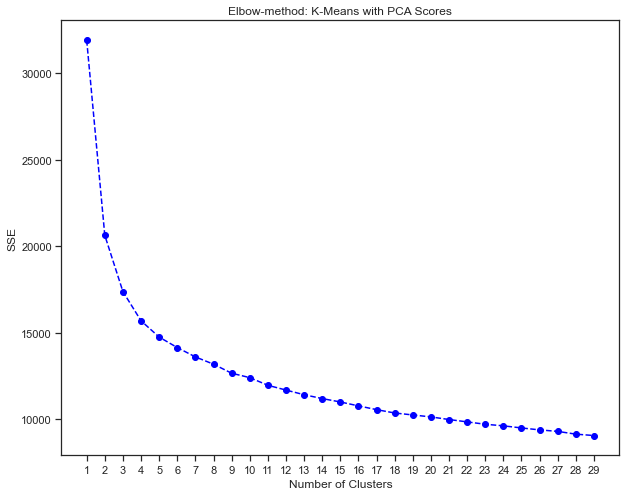

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.style.use("fivethirtyeight")
plt.plot(range(1, 30), sse, marker='o', linestyle='--', color='b')
plt.xticks(range(1, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow-method: K-Means with PCA Scores")
plt.show()

In [54]:
#find the best k
kl = KneeLocator(
    range(1,30), sse, curve="convex", direction="decreasing"
)

kl.elbow

5

In [55]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 30

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs).fit(x_pca_2)
    labels = kmeans.labels_
    sil.append(silhouette_score(x_pca_2, labels, metric = 'euclidean'))

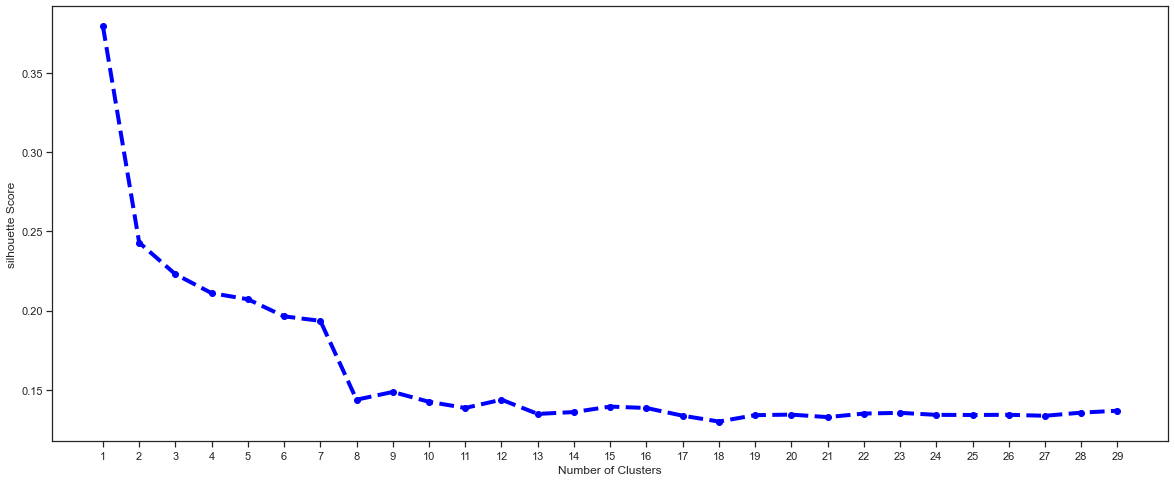

In [56]:
fig, ax = plt.subplots(figsize=(20,8))
plt.style.use("fivethirtyeight")
plt.plot(range(1, 30), sil, marker='o', linestyle='--', color='b')
plt.xticks(range(1, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette Score")
plt.show()

In [57]:
#train the second kmeans with 5 cluster
kmeans_2 = KMeans(
    init = 'random',
    n_clusters = 5,
    n_init=10,
    max_iter =300,
    random_state =1333)

In [58]:
kmeans_2.fit(x_pca_2)

KMeans(init='random', n_clusters=5, random_state=1333)

In [59]:
# The lowest SSE value
kmeans_2.inertia_

14753.48328618057

In [60]:
# Final locations of the centroid
kmeans_2.cluster_centers_

array([[-0.58216513, -0.94484084, -0.25036901,  0.09524447, -0.04533145,
        -0.09617298, -0.13665553, -0.02679283, -0.00531318,  0.07076515,
        -0.04809909],
       [-1.05593668,  0.26025963, -0.44384827, -0.04238298,  0.05299785,
         0.05499519,  0.40235761,  0.04818304, -0.01270545, -0.00592802,
         0.08607505],
       [ 2.37738185,  0.20657071, -0.28727217, -0.06268939,  0.00551827,
         0.09096206,  0.01352892,  0.01265556, -0.00626777, -0.02876283,
         0.0047016 ],
       [-0.95887669,  1.23786855,  0.09085569, -0.12683887, -0.01192461,
         0.02496893, -0.4177512 , -0.12987068,  0.05858072, -0.00752218,
        -0.05390811],
       [-0.19549856, -0.17669748,  0.90447405,  0.07563118,  0.00554775,
        -0.04918178,  0.04843448,  0.0573263 , -0.01391335, -0.03985188,
         0.0069154 ]])

In [61]:
#combine the pc with dataset
df_seg = pd.concat([df_imputed.reset_index(drop = True), pd.DataFrame(x_pca_2)], axis =1)

In [62]:
#put labels in the dataset
df_seg['label'] = kmeans_2.labels_
df_seg['label'] = df_seg['label'].map({0:"seg1", 1:"seg2", 2:"seg3", 3:"seg4", 4:"seg5"})

In [63]:
#check the frequency of eacy segement
df_seg['label'].value_counts()

seg1    1689
seg3    1526
seg5    1515
seg2    1347
seg4     966
Name: label, dtype: int64

In [64]:
x_axis = df_seg[0]
y_axis = df_seg[1]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


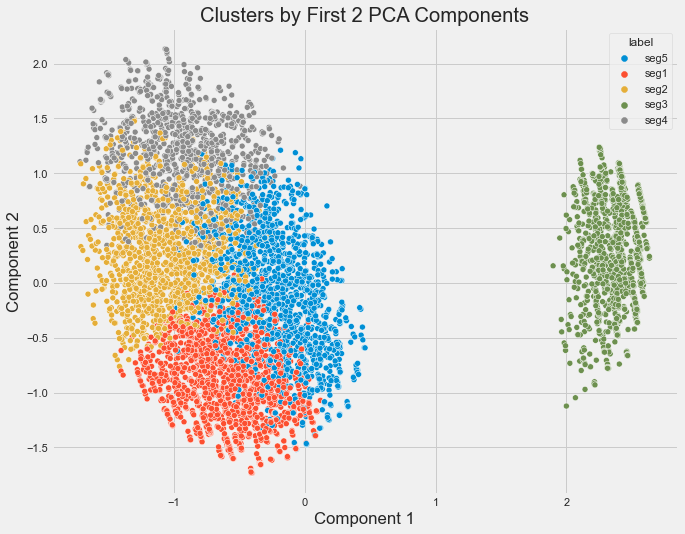

In [65]:
#vislualize the segement with first 2 pc
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_seg['label'])
plt.title('Clusters by First 2 PCA Components')
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


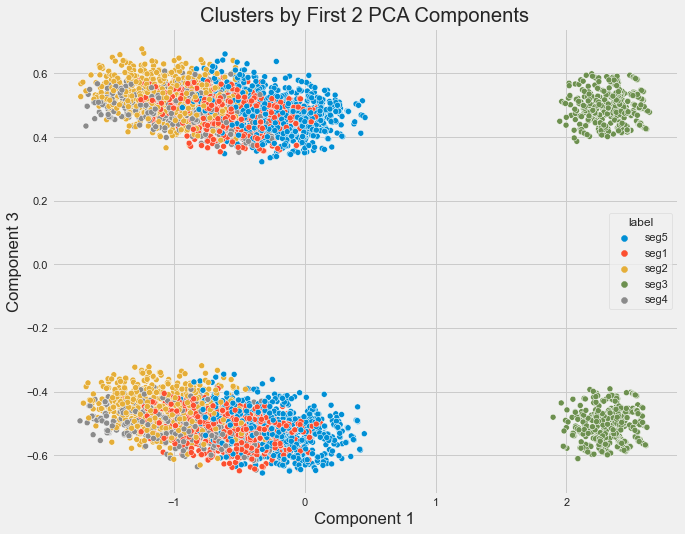

In [66]:
plt.figure(figsize = (10, 8))
sns.scatterplot(df_seg[0], df_seg[4], hue = df_seg['label'])
plt.title('Clusters by First 2 PCA Components')
plt.xlabel("Component 1")
plt.ylabel("Component 3")
plt.show()

/var/folders/0j/57gx2b7s5p3g37yb8bxlg2dh0000gn/T/ipykernel_10953/3098351700.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


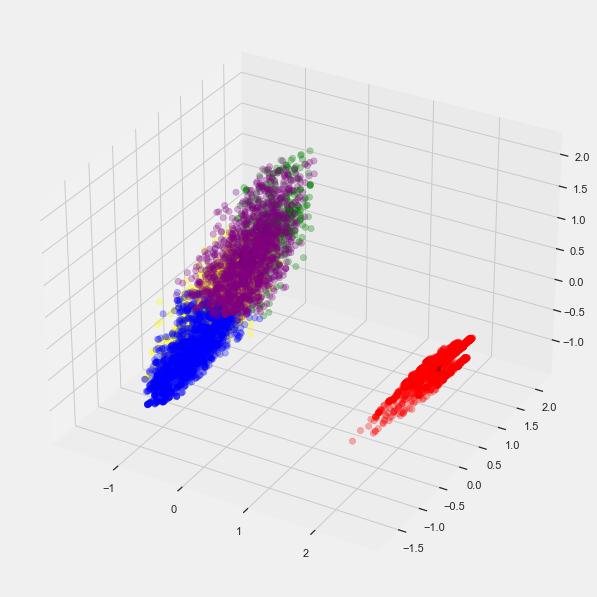

In [67]:
centroids = kmeans_2.cluster_centers_

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

ax.scatter(df_seg[0][df_seg['label']=='seg1'],df_seg[1][df_seg['label']=='seg1'],df_seg[2][df_seg['label']=='seg1'],c="blue",s=40,label="C1", alpha=.3)
ax.scatter(df_seg[0][df_seg['label']=='seg2'],df_seg[1][df_seg['label']=='seg2'],df_seg[2][df_seg['label']=='seg2'],c="yellow",s=40,label="C2", alpha=.3)
ax.scatter(df_seg[0][df_seg['label']=='seg3'],df_seg[1][df_seg['label']=='seg3'],df_seg[2][df_seg['label']=='seg3'],c="red",s=40,label="C3", alpha=.3)
ax.scatter(df_seg[0][df_seg['label']=='seg4'],df_seg[1][df_seg['label']=='seg4'],df_seg[2][df_seg['label']=='seg4'],c="green",s=40,label="C4", alpha=.3)
ax.scatter(df_seg[0][df_seg['label']=='seg5'],df_seg[1][df_seg['label']=='seg5'],df_seg[2][df_seg['label']=='seg5'],c="purple",s=40,label="C5", alpha=.3)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
            marker='x', s=200, linewidths=10,
            color='black', zorder=1)
plt.show()

In [68]:
import chart_studio.plotly as py
import pandas as pd
from  plotly.offline import plot


scatter = dict(
    mode = "markers",
    name = "y",
    type = "scatter3d",
    x = df_seg[0], y = df_seg[1], z = df_seg[2],
    marker = dict( size=2, color="rgb(23, 190, 207)" )
)
clusters = dict(
    alphahull = 7,
    name = "y",
    opacity = 0.1,
    type = "mesh3d",
    x = df_seg[0], y = df_seg[1], z = df_seg[2]
)

layout = dict(
    title = '3d point clustering',
    scene = dict(
        xaxis = dict( zeroline=False ),
        yaxis = dict( zeroline=False ),
        zaxis = dict( zeroline=False ),
    )
)
fig = dict( data=[scatter, clusters], layout=layout )
# Use py.iplot() for IPython notebook
plot(fig, filename='3d point clustering.html')

'3d point clustering.html'

In [69]:
df['label'] = df_seg['label']

In [70]:
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4                No     Fiber optic             No           No  ...   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn label  
0           Electronic check          29.85         29.85     No  seg5  
1               Mailed check          56.95       1889.50     No  seg5  
2               Mailed check          53.85        108.15    Yes  seg5  
3  Bank transfer (automatic)          42.30       1840.75     No  seg5  
4           Electronic check          70.70        151.65    Yes  seg1  

[5 rows x 21 columns]

In [71]:
df.groupby('label')['StreamingTV'].value_counts()

label  StreamingTV        
seg1   No                     1081
       Yes                     608
seg2   Yes                    1045
       No                      302
seg3   No internet service    1526
seg4   Yes                     733
       No                      233
seg5   No                     1194
       Yes                     321
Name: StreamingTV, dtype: int64

In [72]:
df.groupby('label')['StreamingTV'].value_counts()

label  StreamingTV        
seg1   No                     1081
       Yes                     608
seg2   Yes                    1045
       No                      302
seg3   No internet service    1526
seg4   Yes                     733
       No                      233
seg5   No                     1194
       Yes                     321
Name: StreamingTV, dtype: int64

In [73]:
df.groupby('label')['Contract'].value_counts()

label  Contract      
seg1   Month-to-month    1672
       One year            14
       Two year             3
seg2   One year           670
       Month-to-month     622
       Two year            55
seg3   Two year           638
       Month-to-month     524
       One year           364
seg4   Two year           899
       Month-to-month      37
       One year            30
seg5   Month-to-month    1020
       One year           395
       Two year           100
Name: Contract, dtype: int64

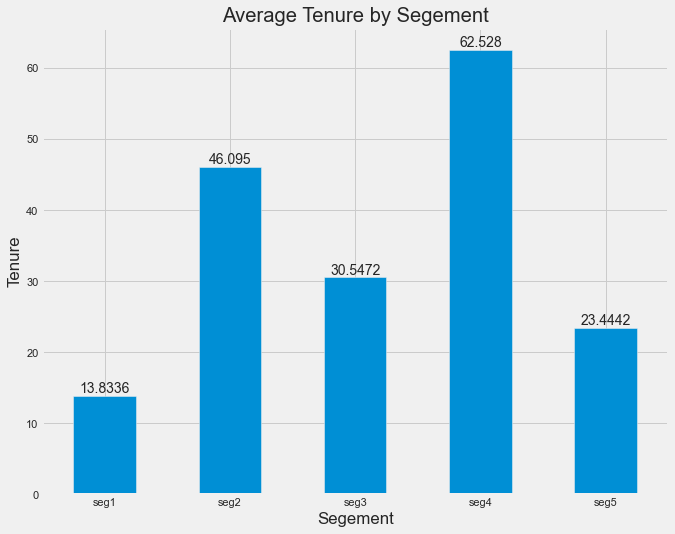

In [74]:
plt.figure(figsize = (10, 8))
ax = df.groupby('label')['tenure'].mean().plot.bar()
for container in ax.containers:
    ax.bar_label(container)
plt.title('Average Tenure by Segement')
plt.xlabel("Segement")
plt.ylabel("Tenure")
plt.xticks(rotation = 360)
plt.show()

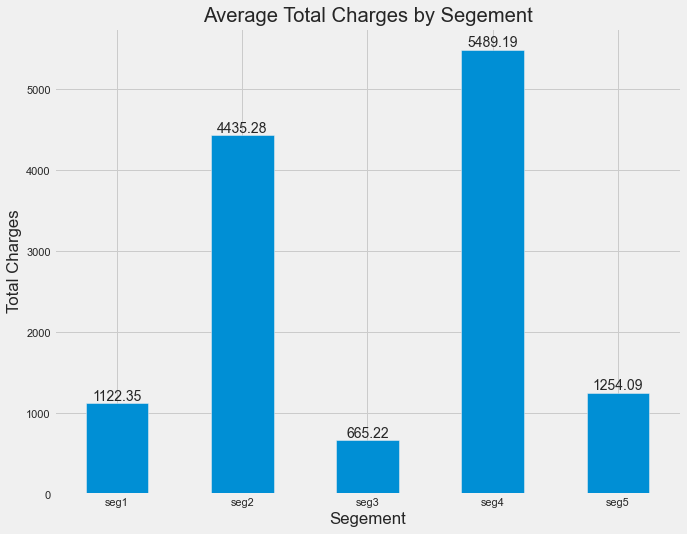

In [75]:
plt.figure(figsize = (10, 8))
ax = df.groupby('label')['TotalCharges'].mean().plot.bar()
for container in ax.containers:
    ax.bar_label(container)
plt.title('Average Total Charges by Segement')
plt.xlabel("Segement")
plt.ylabel("Total Charges")
plt.xticks(rotation = 360)
plt.show()

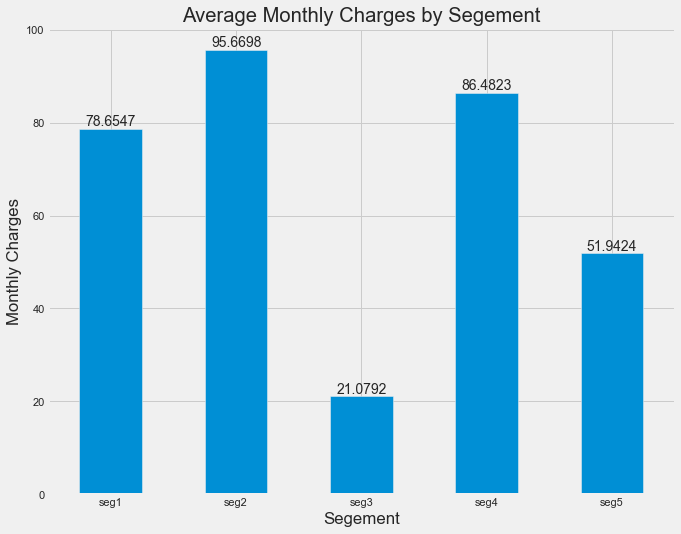

In [76]:
plt.figure(figsize = (10, 8))
ax = df.groupby('label')['MonthlyCharges'].mean().plot.bar()
for container in ax.containers:
    ax.bar_label(container)
plt.title('Average Monthly Charges by Segement')
plt.xlabel("Segement")
plt.ylabel("Monthly Charges")
plt.xticks(rotation = 360)
plt.show()

In [77]:
df.groupby('label')['gender'].value_counts()

label  gender
seg1   Female    891
       Male      798
seg2   Male      699
       Female    648
seg3   Male      779
       Female    747
seg4   Female    485
       Male      481
seg5   Male      798
       Female    717
Name: gender, dtype: int64

In [78]:
df.groupby('label')['Dependents'].value_counts(normalize=True)

label  Dependents
seg1   No            0.888099
       Yes           0.111901
seg2   No            0.720861
       Yes           0.279139
seg3   No            0.578637
       Yes           0.421363
seg4   No            0.528986
       Yes           0.471014
seg5   No            0.704950
       Yes           0.295050
Name: Dependents, dtype: float64

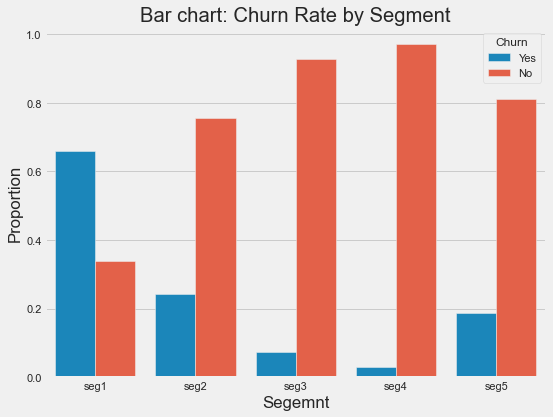

In [79]:
churn = df.groupby('label', as_index=False)['Churn'].value_counts(normalize = True).reset_index()
fig, ax = plt.subplots(figsize=(8,6))
# plot with seaborn barplot
sns.barplot(data=churn, x='label', y='proportion', hue='Churn')

plt.xlabel("Segemnt")
plt.ylabel("Proportion")
plt.title("Bar chart: Churn Rate by Segment")
plt.show()

# Data Engineering

In [80]:
# downsampling
from sklearn.utils import resample
df_churn = df_new[df_new['Churn'] == 'Yes']
df_notchurn = df_new[df_new['Churn'] == 'No']

df_notchurn_down = resample(df_notchurn,
             replace=False,
             n_samples=len(df_churn),
             random_state=33)

print(df_notchurn_down.shape)

(1869, 18)


In [81]:
df_down = pd.concat([df_notchurn_down, df_churn])
df_down['Churn'].value_counts().reset_index()

index  Churn
0    No   1869
1   Yes   1869

In [82]:
#Encode Categorical Variable
#find the categorical variables
categorical = df_down.columns[df_down.dtypes == object]

#encode the categorical variables
df_down = pd.get_dummies(df_down, columns = categorical, drop_first=True)
df_down.head()

tenure  MonthlyCharges  TotalCharges  SeniorCitizen_Yes  Partner_Yes  \
2478       4           44.55        220.75                  0            0   
3607      13           55.15        742.90                  0            0   
3120      69           24.95       1718.35                  0            1   
1317       3           24.60         86.35                  0            0   
3981       8           85.20        695.75                  1            0   

      Dependents_Yes  MultipleLines_No phone service  MultipleLines_Yes  \
2478               0                               0                  0   
3607               0                               0                  0   
3120               0                               0                  1   
1317               0                               0                  1   
3981               0                               0                  1   

      InternetService_Fiber optic  InternetService_No  ...  StreamingTV_Yes  \
2478                            0                   0  ...                0   
3607                            0                   0  ...                0   
3120                            0                   1  ...                0   
1317                            0                   1  ...                0   
3981                            1                   0  ...                0   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
2478                                    0                    0   
3607                                    0                    0   
3120                                    1                    0   
1317                                    1                    0   
3981                                    0                    1   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
2478                  0                  0                     0   
3607                  1                  0                     0   
3120                  0                  1                     1   
1317                  0                  0                     0   
3981                  0                  0                     0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
2478                                      0                               0   
3607                                      0                               0   
3120                                      1                               0   
1317                                      0                               0   
3981                                      0                               1   

      PaymentMethod_Mailed check  Churn_Yes  
2478                           1          0  
3607                           1          0  
3120                           0          0  
1317                           1          0  
3981                           0          0  

[5 rows x 29 columns]

In [83]:
#Define target variable and predictors
x = df_down.drop(['Churn_Yes'], axis = 1)
y = df_down['Churn_Yes']

In [84]:
#split data
from sklearn.model_selection import train_test_split
train_x_ori, test_x_ori, train_y_ori, test_y_ori = train_test_split(x, y, test_size = 0.2, random_state=1)

In [85]:
train_x_ori.shape

(2990, 28)

In [86]:
train_y_ori.shape

(2990,)

In [87]:
test_x_ori.shape

(748, 28)

In [88]:
test_y_ori.shape

(748,)

In [89]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
sc = StandardScaler()
train_x_sc = sc.fit_transform(train_x_ori)
test_x_sc = sc.transform (test_x_ori)
train_x = pd.DataFrame(train_x_sc, columns = train_x_ori.columns)
test_x = pd.DataFrame(test_x_sc, columns = test_x_ori.columns)

In [90]:
print(train_x.shape, train_y_ori.shape, test_x.shape, test_y_ori.shape)

(2990, 28) (2990,) (748, 28) (748,)


# SVM

In [91]:
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
clf_svm = SVC(random_state =2)
clf_svm.fit(train_x, train_y_ori)

SVC(random_state=2)

In [92]:
y_train_pred = clf_svm.predict(train_x)
y_test_pred = clf_svm.predict(test_x)

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(train_y_ori, y_train_pred))
confusion_matrix(train_y_ori, y_train_pred)

0.7876254180602007


array([[1112,  373],
       [ 262, 1243]])

In [94]:
print(accuracy_score(test_y_ori, y_test_pred))
confusion_matrix(test_y_ori, y_test_pred)

0.7513368983957219


array([[275, 109],
       [ 77, 287]])

In [95]:
#check the accuracy, precision and recall
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
accuracy_initial = accuracy_score(test_y_ori, y_test_pred)
precision_initial = precision_score(test_y_ori, y_test_pred)
recall_initial = recall_score(test_y_ori, y_test_pred)
f1_initial = f1_score(test_y_ori, y_test_pred)
print("Accuracy of initial SVM:", accuracy_initial)
print("Precision of initial SVM:", precision_initial)
print("Recall of initial SVM:", recall_initial)
print("F1 of initial SVM:", f1_initial)

Accuracy of initial SVM: 0.7513368983957219
Precision of initial SVM: 0.7247474747474747
Recall of initial SVM: 0.7884615384615384
F1 of initial SVM: 0.7552631578947367


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



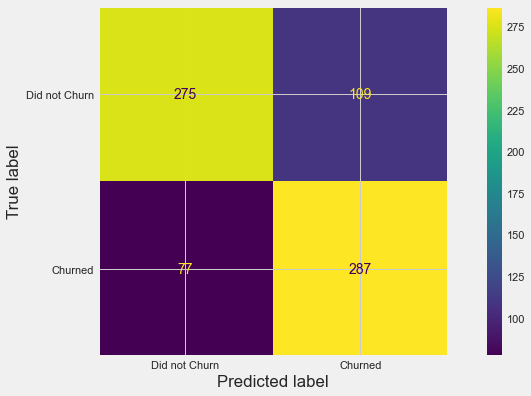

In [96]:
plot_confusion_matrix(clf_svm,
                       test_x,
                       test_y_ori,
                       values_format = 'd',
                       display_labels = ['Did not Churn', 'Churned'])

In [97]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'C': [0.1,1,10,100],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']}]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv =5,
    scoring = 'accuracy',
    verbose = 0)

In [98]:
import time
start = time.time()
optimal_params.fit(train_x, train_y_ori)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 49.225435972213745s


In [99]:
print(optimal_params.best_params_)

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


In [100]:
clf_svm_tune = SVC(random_state = 2, C= 0.1, gamma =0.01,probability=True)
clf_svm_tune.fit(train_x, train_y_ori)

SVC(C=0.1, gamma=0.01, probability=True, random_state=2)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



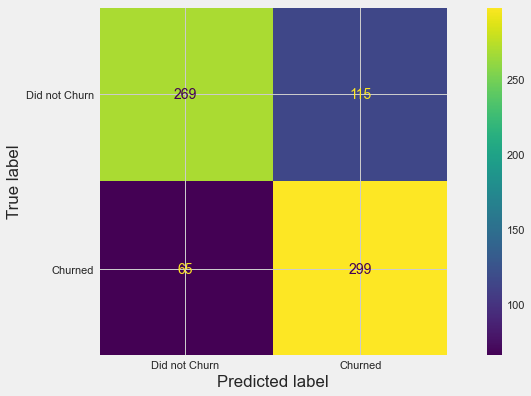

In [101]:
plot_confusion_matrix(clf_svm_tune,
                       test_x,
                       test_y_ori,
                       values_format = 'd',
                       display_labels = ['Did not Churn', 'Churned'])

In [102]:
y_train_pred_tune = clf_svm_tune.predict(train_x)
y_test_pred_tune = clf_svm_tune.predict(test_x)

In [103]:
print(accuracy_score(test_y_ori, y_test_pred_tune))
confusion_matrix(test_y_ori, y_test_pred_tune)

0.7593582887700535


array([[269, 115],
       [ 65, 299]])

In [104]:
#check the accuracy, precision and recall
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
accuracy_tune = accuracy_score(test_y_ori, y_test_pred_tune)
precision_tune = precision_score(test_y_ori, y_test_pred_tune)
recall_tune = recall_score(test_y_ori, y_test_pred_tune)
f1_tune = f1_score(test_y_ori, y_test_pred_tune)
print("Accuracy of tuned SVM:", accuracy_tune)
print("Precision of tuned SVM:", precision_tune)
print("Recall of tuned SVM:", recall_tune)
print("F1 of tuned SVM:", f1_tune)

Accuracy of tuned SVM: 0.7593582887700535
Precision of tuned SVM: 0.7222222222222222
Recall of tuned SVM: 0.8214285714285714
F1 of tuned SVM: 0.7686375321336761


In [105]:
#PCA Analysis
from sklearn.decomposition import PCA
pca = PCA()
train_x_pca = pca.fit_transform(train_x)


In [106]:
train_x.shape

(2990, 28)

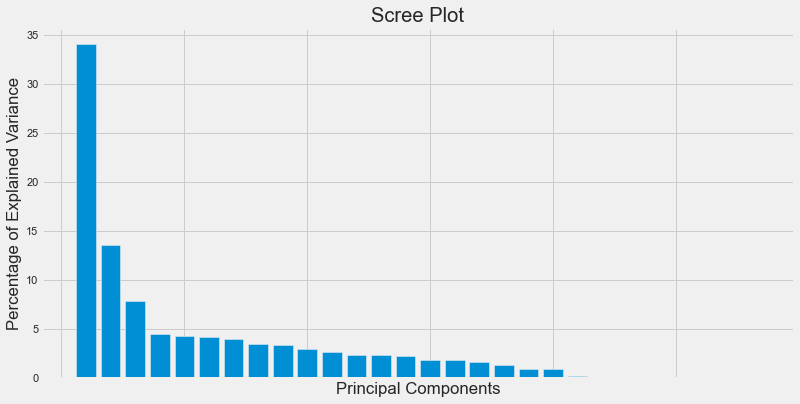

In [107]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height = per_var)
plt.tick_params(
    axis = 'x',
    which = 'both',
    bottom = False,
    labelbottom=False)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

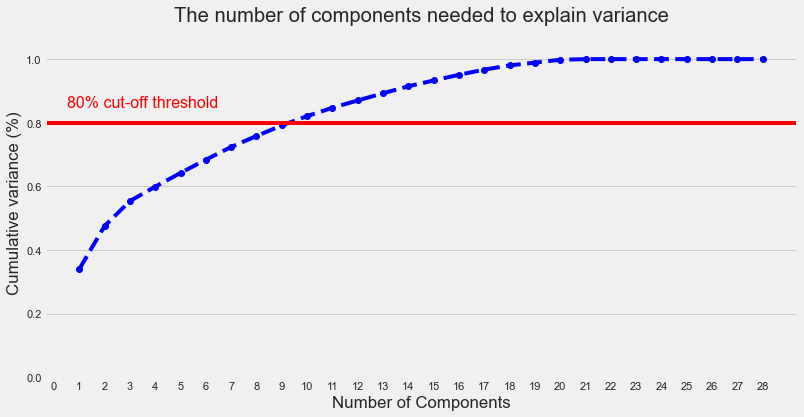

In [108]:
#plot the cumulative variance with number of components
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 29, step=1)
y = np.cumsum(pca.explained_variance_ratio_) #cumulatice variance ratio

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 29, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [109]:
pca_2 = PCA(n_components=9)

In [110]:
train_x_pca2 = pca_2.fit_transform(train_x)
#train_x_pca = pd.DataFrame(train_x_pca, columns = train_x.columns)
train_x_pca2.shape

(2990, 9)

In [111]:
sc = StandardScaler()
train_x_pca_sc = sc.fit_transform(train_x_pca2)

In [112]:
param_grid = [
    {'C': [0.1,1,10,100],
     'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
     'kernel': ['rbf']}]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv =5,
    scoring = 'accuracy',
    verbose = 0)

In [113]:
import time
start = time.time()
optimal_params.fit(train_x_pca2, train_y_ori)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 42.56007671356201s


In [114]:
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [115]:
clf_svm_pca = SVC(random_state = 2, C= 0.1, gamma =0.1)
clf_svm_pca.fit(train_x_pca2, train_y_ori)

SVC(C=0.1, gamma=0.1, random_state=2)

In [116]:
test_x_pca2 = pca_2.fit_transform(test_x)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



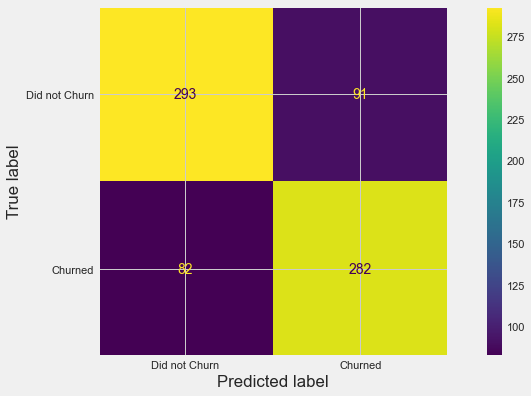

In [117]:
plot_confusion_matrix(clf_svm_pca,
                       test_x_pca2,
                       test_y_ori,
                       values_format = 'd',
                       display_labels = ['Did not Churn', 'Churned'])

In [118]:
y_train_pred_pca = clf_svm_pca.predict(train_x_pca2)
y_test_pred_pca = clf_svm_pca.predict(test_x_pca2)

In [119]:
print(accuracy_score(test_y_ori, y_test_pred_pca))
confusion_matrix(test_y_ori, y_test_pred_pca)

0.7687165775401069


array([[293,  91],
       [ 82, 282]])

In [120]:
#check the accuracy, precision and recall
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
accuracy_pca = accuracy_score(test_y_ori, y_test_pred_pca)
precision_pca = precision_score(test_y_ori, y_test_pred_pca)
recall_pca = recall_score(test_y_ori, y_test_pred_pca)
f1_pca = f1_score(test_y_ori, y_test_pred_tune)
print("Accuracy of SVM_pca:", accuracy_pca)
print("Precision of SVM_pca:", precision_pca)
print("Recall of SVM_pca:", recall_pca)
print("F1 of SVM_pca:", f1_pca)

Accuracy of SVM_pca: 0.7687165775401069
Precision of SVM_pca: 0.7560321715817694
Recall of SVM_pca: 0.7747252747252747
F1 of SVM_pca: 0.7686375321336761


Text(0.5, 1.0, 'Feature Importance')

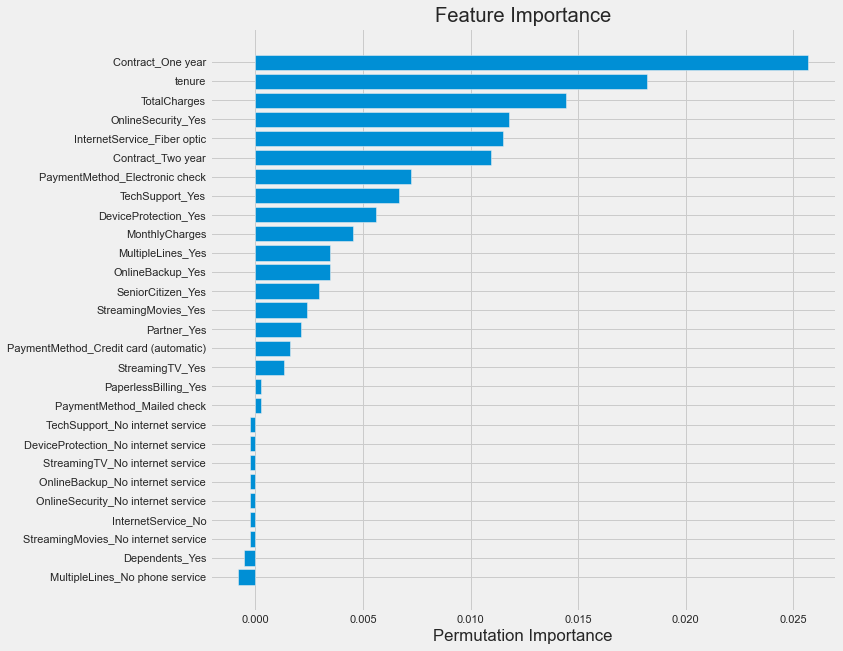

In [121]:
from sklearn.inspection import permutation_importance


perm_importance = permutation_importance(clf_svm_tune , test_x, test_y_ori)

feature_names = test_x.columns
features = np.array(feature_names)
plt.figure(figsize = (10,10))

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")

# Decision Tree

In [122]:
from sklearn.tree import DecisionTreeClassifier
# Fit the decision tree with the penalty matrix
tree_m = DecisionTreeClassifier(criterion='gini',
                              splitter='best',
                              class_weight = 'balanced',
                              max_depth=None, random_state=42)

tree_m.fit(train_x_ori, train_y_ori) 

DecisionTreeClassifier(class_weight='balanced', random_state=42)

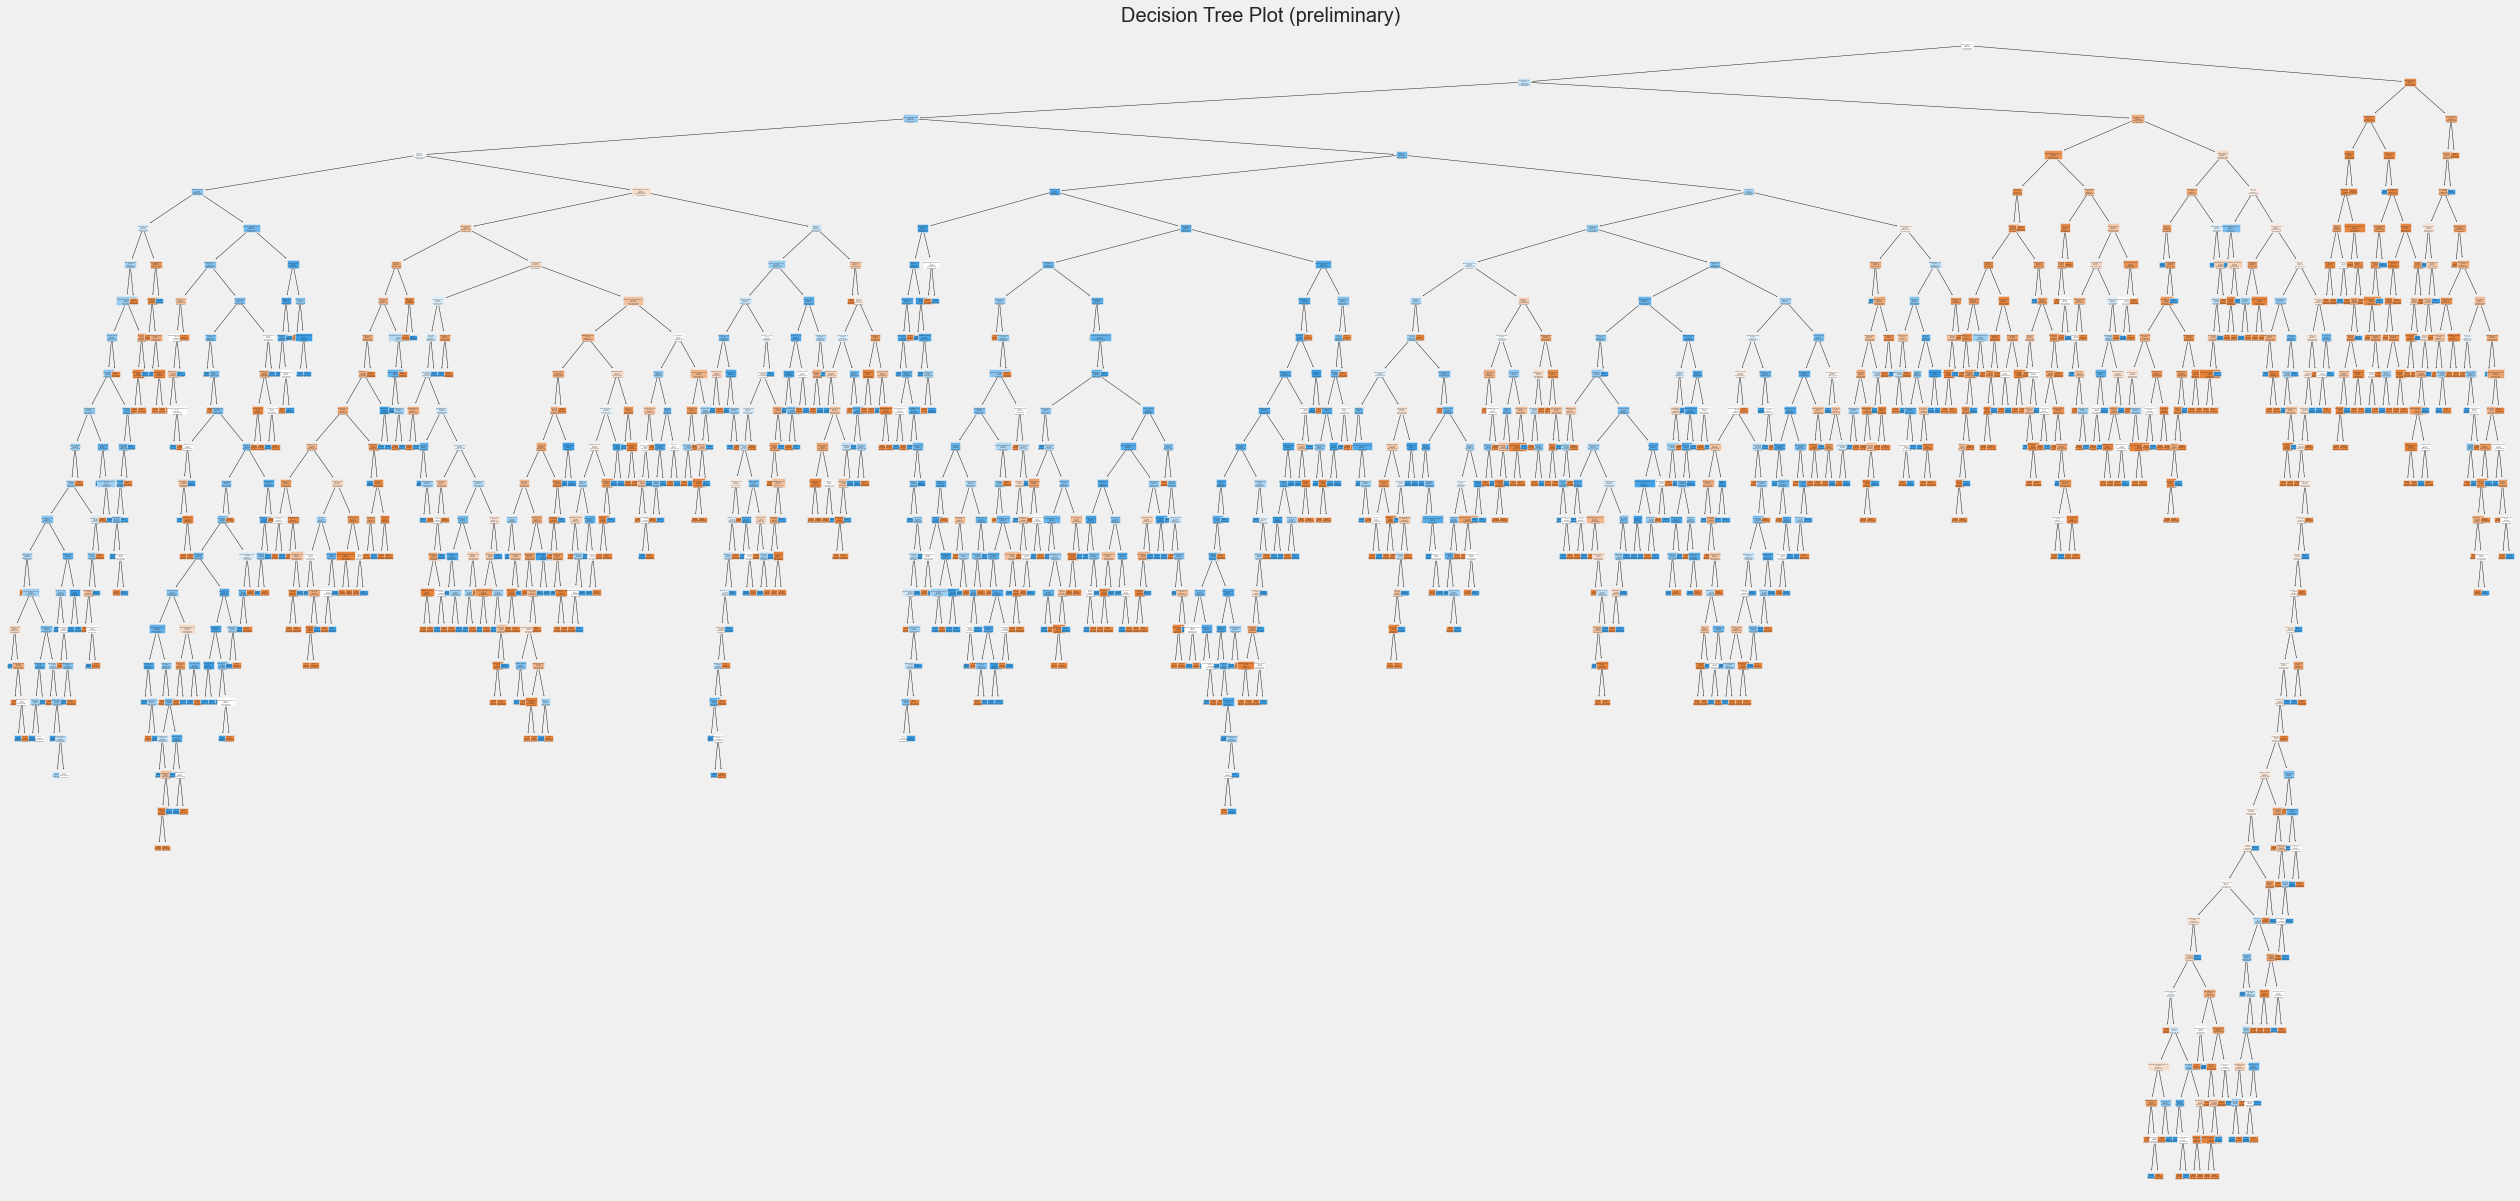

In [123]:
#Visualizing a Decision Tree
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(40,20))

plot_tree(tree_m, feature_names=train_x.columns, class_names=['Not Churned', "Churned"], max_depth=None, filled=True)
plt.title("Decision Tree Plot (preliminary)", size= 20)
plt.show()

In [124]:
tree_m.get_depth()

31

In [125]:
tree_m.get_n_leaves()

776

In [126]:
y_train_pred = tree_m.predict(train_x)
y_test_pred = tree_m.predict(test_x)
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(train_y_ori, y_train_pred))
confusion_matrix(train_y_ori, y_train_pred)

0.711371237458194


array([[ 913,  572],
       [ 291, 1214]])

In [127]:
print(accuracy_score(test_y_ori, y_test_pred))
confusion_matrix(test_y_ori, y_test_pred)

0.7018716577540107


array([[225, 159],
       [ 64, 300]])

In [128]:
accuracy_d = accuracy_score(test_y_ori, y_test_pred)
recall_d = recall_score(test_y_ori, y_test_pred)
precision_d = precision_score(test_y_ori, y_test_pred)
f1_d = f1_score(test_y_ori, y_test_pred)
print("Accuracy of Decision Tree:", accuracy_d)
print("Precision of Decision Tree:", precision_d)
print("Recall of Decision Tree:", recall_d)
print("F1 of Decision Tree:", f1_d)

Accuracy of Decision Tree: 0.7018716577540107
Precision of Decision Tree: 0.6535947712418301
Recall of Decision Tree: 0.8241758241758241
F1 of Decision Tree: 0.7290400972053462


In [129]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': range(1, 30),
    'min_samples_leaf': [5, 10, 20, 25,30,35,40,45,50, 55,60,65,70,75,80,100, 500, 1000],
    'criterion': ["gini", "entropy"]
}

In [130]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=tree_m, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = 'accuracy')

In [131]:
import time
start = time.time()
grid_search.fit(train_x_pca2, train_y_ori)
stop = time.time()
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 1044 candidates, totalling 5220 fits
Training time: 10.6721510887146s


In [132]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 40}


In [133]:
# Fit the decision tree with the penalty matrix
tree = DecisionTreeClassifier(criterion='gini',
                              splitter='best',
                              class_weight = 'balanced',
                              max_depth=5, min_samples_leaf=55, random_state=42)

tree.fit(train_x_ori, train_y_ori) 

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=55, random_state=42)

In [134]:
y_train_pred_p = tree.predict(train_x_ori)
y_test_pred_p = tree.predict(test_x_ori)
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(test_y_ori, y_test_pred_p))
confusion_matrix(test_y_ori, y_test_pred_p)

0.7553475935828877


array([[266, 118],
       [ 65, 299]])

In [135]:
accuracy_p = accuracy_score(test_y_ori, y_test_pred_p)
recall_p = recall_score(test_y_ori, y_test_pred_p)
precision_p = precision_score(test_y_ori, y_test_pred_p)
f1_p = f1_score(test_y_ori, y_test_pred_p)
print("Accuracy of Decision Tree:", accuracy_p)
print("Precision of Decision Tree:", precision_p)
print("Recall of Decision Tree:", recall_p)
print("F1 of Decision Tree:", f1_p)

Accuracy of Decision Tree: 0.7553475935828877
Precision of Decision Tree: 0.7170263788968825
Recall of Decision Tree: 0.8214285714285714
F1 of Decision Tree: 0.7656850192061461


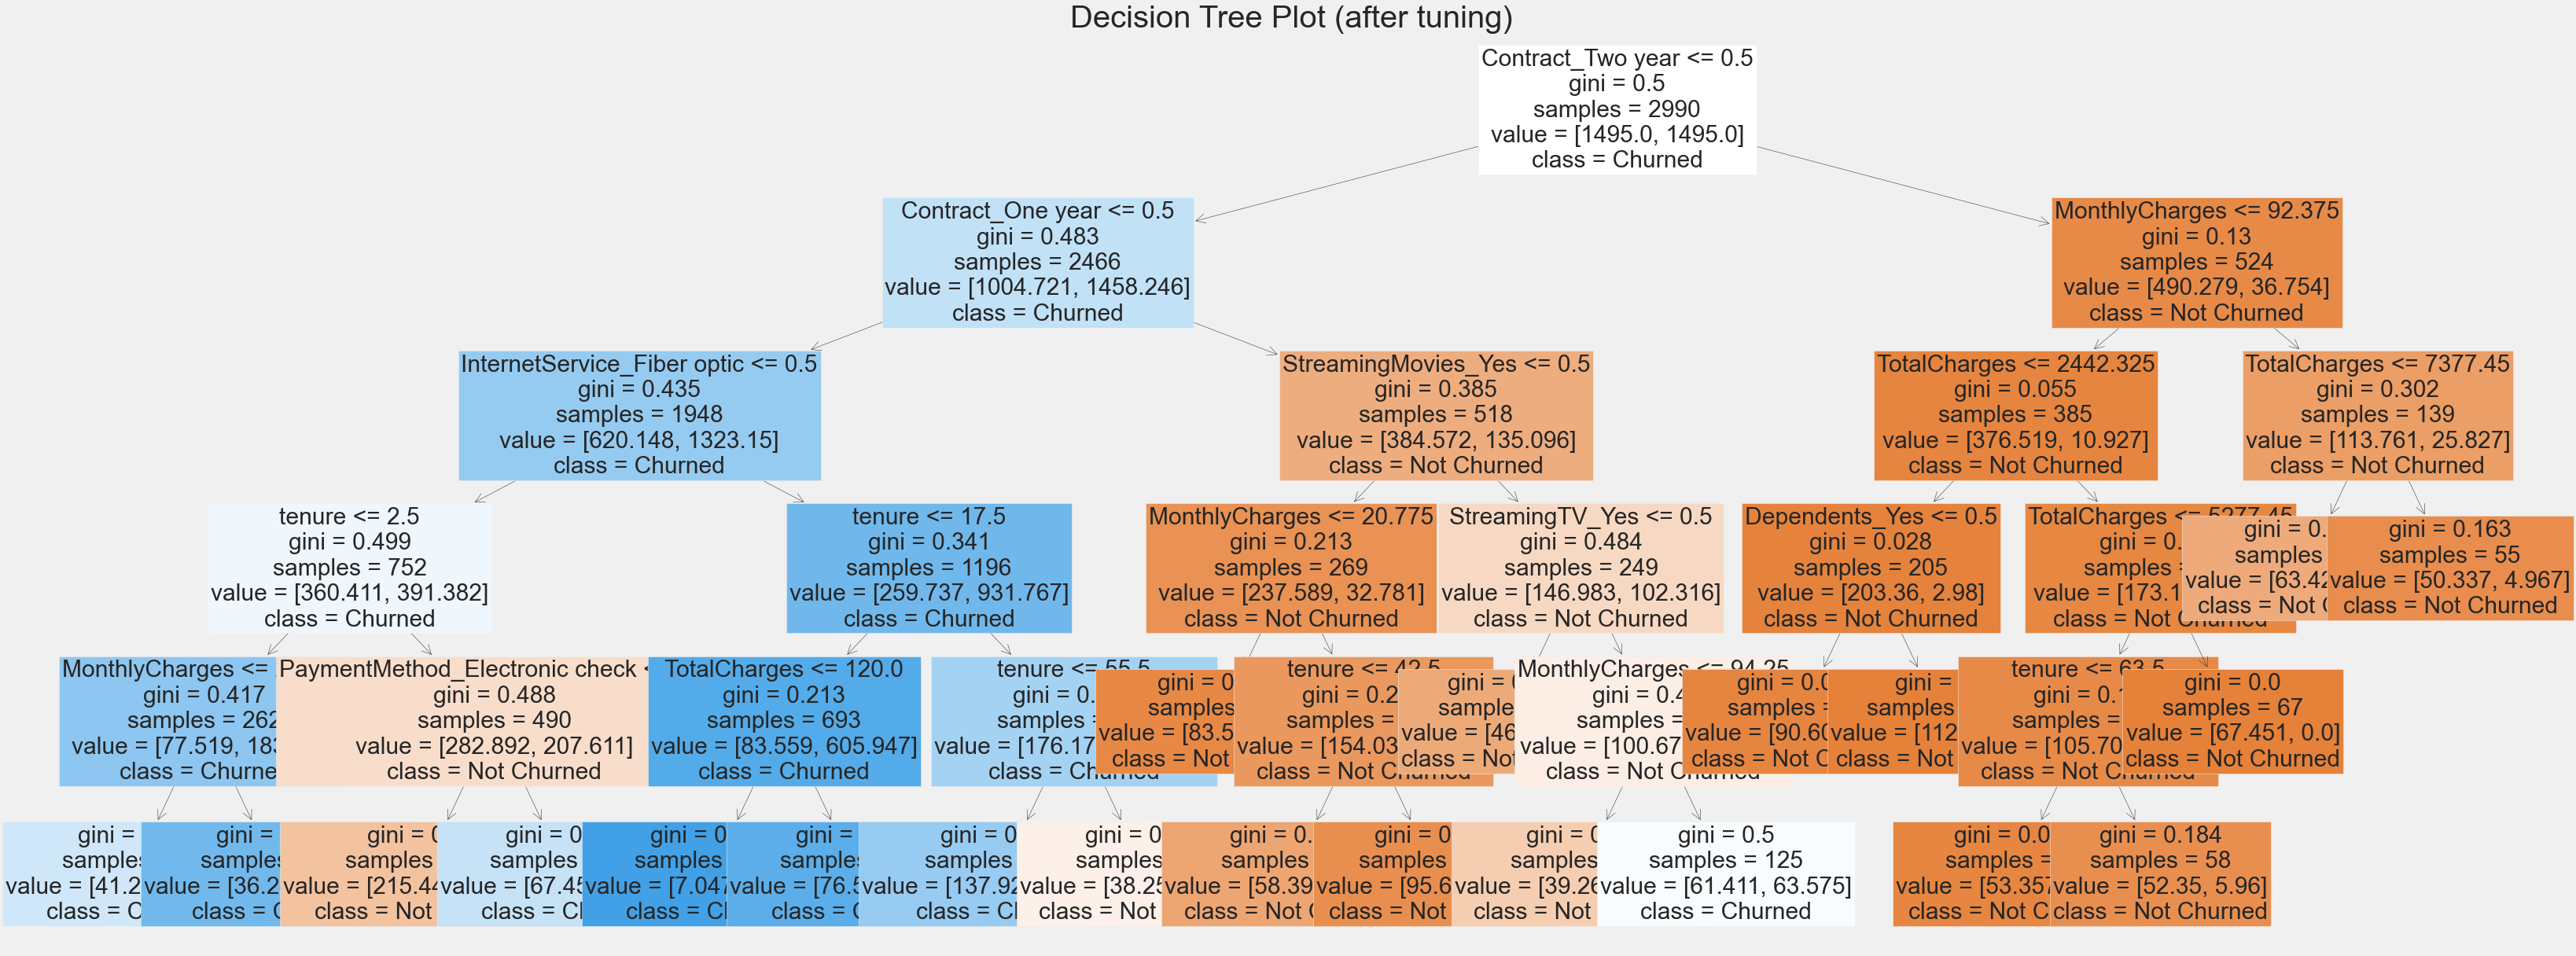

In [136]:
#Visualizing a Decision Tree
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(50,20))

plot_tree(tree, feature_names=train_x.columns, class_names=['Not Churned', "Churned"], max_depth=None, filled=True,fontsize=30)
plt.title("Decision Tree Plot (after tuning)", size= 40)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



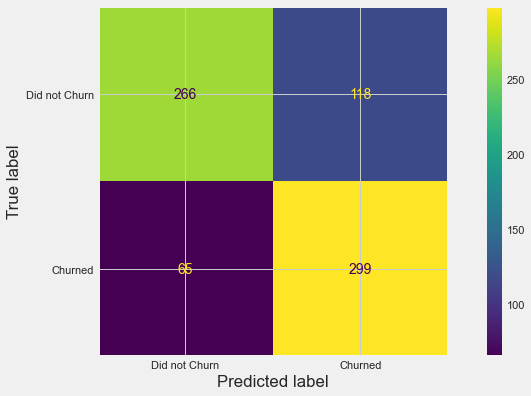

In [137]:
plot_confusion_matrix(tree,
                       test_x_ori,
                       test_y_ori,
                       #values_format = 'd',
                       display_labels = ['Did not Churn', 'Churned'])

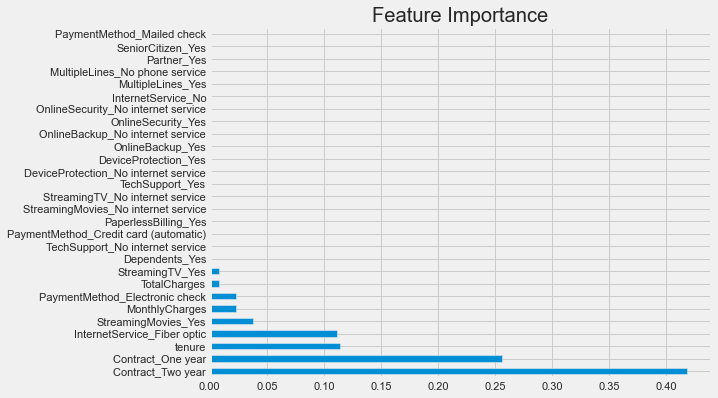

In [138]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(tree.feature_importances_, index=train_x.columns).sort_values(ascending=False)

# Plot a simple bar chart
fig, ax = plt.subplots(figsize=(8,6))
feature_importances.plot.barh();
plt.title('Feature Importance')
plt.show()

# Random Forest

In [139]:
#import required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.metrics import plot_confusion_matrix

In [140]:
#train the random forst model
rf = RandomForestClassifier(random_state=333)
rf.fit(train_x_ori, train_y_ori)

RandomForestClassifier(random_state=333)

In [141]:
#make predictions with the model
y_rf_pred = rf.predict(test_x_ori)

In [142]:
#check the accuracy, precision and recall

accuracy_rf = accuracy_score(test_y_ori, y_rf_pred)
precision_rf = precision_score(test_y_ori, y_rf_pred)
recall_rf = recall_score(test_y_ori, y_rf_pred)
f1_rf = f1_score(test_y_ori, y_rf_pred)
print("Accuracy of Random Forest:", accuracy_rf)
print("Precision of Random Forest:", precision_rf)
print("Recall of Random Forest:", recall_rf)
print("Recall of Random Forest:", f1_rf)

Accuracy of Random Forest: 0.7553475935828877
Precision of Random Forest: 0.7375328083989501
Recall of Random Forest: 0.771978021978022
Recall of Random Forest: 0.7543624161073824


In [143]:
#define the parameter distribution for tuning
param_grid = { 
    'n_estimators': [50, 200, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : range(30),
    'criterion' :["gini", "entropy"]
}
optimal_params = GridSearchCV(RandomForestClassifier(),param_grid,cv =5,scoring = 'accuracy',verbose = 0)

In [144]:
import time
start = time.time()
optimal_params.fit(train_x_ori, train_y_ori)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 799.5761511325836s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


60 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/anaconda3/lib/python3.9/site-packages

In [145]:
print(optimal_params.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 50}


In [146]:
rfc1=RandomForestClassifier(random_state=333, max_features='auto', n_estimators= 50, max_depth=7, criterion='entropy')
rfc1.fit(train_x_ori, train_y_ori)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=50,
                       random_state=333)

In [147]:
#make predictions with the model
y_pred1 = rfc1.predict(test_x_ori)


In [148]:
#check the accuracy, precision and recall

accuracy1 = accuracy_score(test_y_ori, y_pred1)
precision1 = precision_score(test_y_ori, y_pred1)
recall1 = recall_score(test_y_ori, y_pred1)
f1 = f1_score(test_y_ori, y_pred1)
print("Accuracy of Random Forest with PCA selected Features:", accuracy1)
print("Precision of Random Forest with PCA selected Features:", precision1)
print("Recall of Random Forest with PCA selected Features:", recall1)
print("F1 of Decision Tree:", f1)

Accuracy of Random Forest with PCA selected Features: 0.7647058823529411
Precision of Random Forest with PCA selected Features: 0.7361809045226131
Recall of Random Forest with PCA selected Features: 0.804945054945055
F1 of Decision Tree: 0.7690288713910761


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



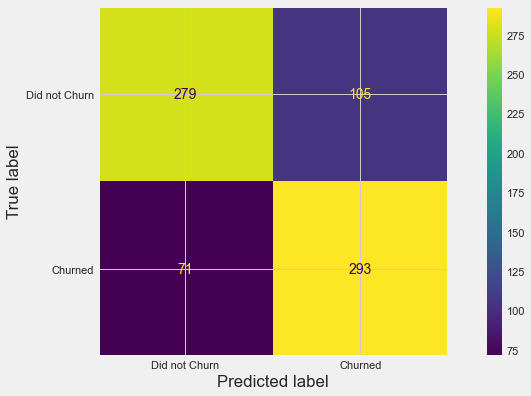

In [149]:
plot_confusion_matrix(rfc1,
                       test_x_ori,
                       test_y_ori,
                       #values_format = 'd',
                       display_labels = ['Did not Churn', 'Churned'])

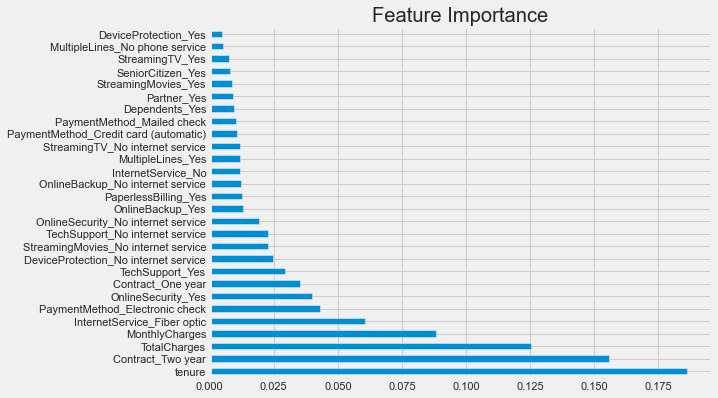

In [150]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rfc1.feature_importances_, index=train_x.columns).sort_values(ascending=False)

# Plot a simple bar chart
fig, ax = plt.subplots(figsize=(8,6))
feature_importances.plot.barh();
plt.title('Feature Importance')
plt.show()

# GradientBoost

In [151]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [152]:
gb = GradientBoostingClassifier(random_state=10)
gb.fit(train_x_ori,train_y_ori)

GradientBoostingClassifier(random_state=10)

## Find the best number of estimators with a fix learning rate. 

In [153]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,cv=5)
gsearch1.fit(train_x_ori,train_y_ori)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 81, 10)},
             scoring='roc_auc')

In [154]:
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_


({'mean_fit_time': array([0.02474079, 0.03143687, 0.04129648, 0.05141816, 0.06157999,
         0.07099762, 0.08121834]),
  'std_fit_time': array([0.00132232, 0.00062962, 0.00075562, 0.00114493, 0.000888  ,
         0.00098724, 0.00128637]),
  'mean_score_time': array([0.00254879, 0.00191135, 0.00212302, 0.00218029, 0.00228124,
         0.00237532, 0.00253   ]),
  'std_score_time': array([3.77211244e-04, 9.13649610e-05, 1.27763318e-04, 4.18690179e-05,
         2.77711697e-05, 6.56622947e-05, 1.26793861e-05]),
  'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
               mask=[False, False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 20},
   {'n_estimators': 30},
   {'n_estimators': 40},
   {'n_estimators': 50},
   {'n_estimators': 60},
   {'n_estimators': 70},
   {'n_estimators': 80}],
  'split0_test_score': array([0.84648814, 0.85014039, 0.85058223, 0.85194693, 0.85255098,
         0.85

In [180]:
#Grid seach on subsample and max_features
param_test2 = {'max_depth':range(5,100,1), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,
                                                max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(train_x_ori,train_y_ori)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=70,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(5, 100),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='roc_auc')

In [181]:
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([0.09040422, 0.07502022, 0.06751924, 0.05918226, 0.05543156,
         0.0937017 , 0.07613111, 0.06747112, 0.06119552, 0.05415592,
         0.09774132, 0.08120899, 0.06766224, 0.05989652, 0.05568199,
         0.10175214, 0.08025308, 0.06823936, 0.06011481, 0.05424957,
         0.10469413, 0.08227391, 0.06792121, 0.06224127, 0.05628095,
         0.1050343 , 0.08236589, 0.06788898, 0.06134596, 0.05425119,
         0.10762973, 0.08256283, 0.06804247, 0.05994964, 0.05585752,
         0.11333857, 0.08526082, 0.068783  , 0.06108456, 0.05500259,
         0.10839348, 0.08178339, 0.06904702, 0.06137176, 0.05391951,
         0.10957346, 0.08087983, 0.06821737, 0.06133862, 0.05433497,
         0.1091177 , 0.09852133, 0.13355398, 0.0746695 , 0.06024899,
         0.10969934, 0.08045807, 0.0698905 , 0.06109772, 0.05472727,
         0.10930681, 0.08199334, 0.06864128, 0.05920496, 0.05557542,
         0.10883875, 0.08274398, 0.068432  , 0.06139283, 0.05423794,
         0.109522

In [182]:
#Grid seach on subsample and max_features
param_test3 = {'min_samples_split':range(800,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=8,
                                                    max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)
gsearch3.fit(train_x_ori,train_y_ori)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  n_estimators=70,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'min_samples_leaf': range(30, 71, 10),
                         'min_samples_split': range(800, 2100, 200)},
             scoring='roc_auc')

In [183]:
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([0.06761737, 0.05593929, 0.05232639, 0.05131116, 0.04524522,
         0.04398751, 0.02864032, 0.05967307, 0.05474   , 0.05113506,
         0.04941154, 0.04466081, 0.04349065, 0.02940545, 0.0603879 ,
         0.05451646, 0.0510838 , 0.04986544, 0.044802  , 0.04309525,
         0.02860441, 0.06000409, 0.05420756, 0.05000978, 0.04832215,
         0.0450305 , 0.04335012, 0.02844663, 0.06012764, 0.05467901,
         0.0499198 , 0.04984307, 0.04467072, 0.04313321, 0.02906675]),
  'std_fit_time': array([0.00420487, 0.00099406, 0.00123526, 0.00191673, 0.00101406,
         0.00018356, 0.00058248, 0.00130237, 0.00189324, 0.00150112,
         0.00085537, 0.00090463, 0.00089164, 0.00010408, 0.00050729,
         0.00150251, 0.00136452, 0.00059071, 0.00063877, 0.00120126,
         0.00051978, 0.00028097, 0.00168228, 0.00156009, 0.0013501 ,
         0.00039817, 0.00092891, 0.0006477 , 0.00057273, 0.00041772,
         0.00117233, 0.00041242, 0.00087997, 0.00120205, 0.00069964]

In [187]:
#Grid seach on subsample and max_features
param_test4 = {'max_features':range(4,100,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,#max_depth=8, 
                            min_samples_split=800, min_samples_leaf=50, subsample=0.8, random_state=10),
                       param_grid = param_test4, scoring='roc_auc',n_jobs=4, cv=5)
gsearch4.fit(train_x_ori,train_y_ori)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


175 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
175 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 586, in fit
    n_stages = self._fit_stages(
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 663, in _fit_stages
    raw_predictions = self._fit_stage(
  File "/opt/anaconda3/lib/python3.9/s

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(min_samples_leaf=50,
                                                  min_samples_split=800,
                                                  n_estimators=70,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'max_features': range(4, 100, 2)},
             scoring='roc_auc')

In [188]:
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([0.06124043, 0.06199193, 0.06823807, 0.07298307, 0.07897482,
         0.08577318, 0.09025068, 0.09943957, 0.10564508, 0.109938  ,
         0.11752219, 0.12456503, 0.12923632, 0.00188398, 0.00181231,
         0.00184565, 0.00185256, 0.00173922, 0.00172238, 0.00170312,
         0.00172033, 0.00177002, 0.00175767, 0.00178404, 0.00188637,
         0.00183196, 0.00169716, 0.00181947, 0.00181227, 0.00170803,
         0.00180645, 0.00180602, 0.00173182, 0.00182815, 0.00192761,
         0.00192432, 0.00186281, 0.00200977, 0.00193996, 0.00188479,
         0.00195527, 0.00193486, 0.00189013, 0.00194616, 0.00193419,
         0.00196514, 0.00193629, 0.00202312]),
  'std_fit_time': array([4.52064051e-03, 1.15287618e-03, 4.92958428e-04, 1.00828666e-03,
         1.70487677e-03, 1.13368195e-03, 2.38505098e-03, 1.82560185e-03,
         1.08705516e-03, 2.38247724e-03, 2.76165171e-03, 1.67944191e-03,
         1.51782559e-03, 7.63241887e-05, 8.12503933e-05, 1.11986443e-04,
       

In [189]:
#Grid seach on subsample and max_features
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=70,max_depth=8, 
                            min_samples_split=800, min_samples_leaf=50, subsample=0.8, random_state=10, max_features=7),
                       param_grid = param_test5, scoring='roc_auc',n_jobs=4,cv=5)
gsearch5.fit(train_x_ori,train_y_ori)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8, max_features=7,
                                                  min_samples_leaf=50,
                                                  min_samples_split=800,
                                                  n_estimators=70,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
             scoring='roc_auc')

In [190]:
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([0.06579084, 0.06567259, 0.06715026, 0.06896205, 0.07232661,
         0.07328119]),
  'std_fit_time': array([0.00356546, 0.00082353, 0.00137701, 0.0021258 , 0.00119178,
         0.00181165]),
  'mean_score_time': array([0.00208755, 0.00213299, 0.0022016 , 0.00226135, 0.00222988,
         0.00223222]),
  'std_score_time': array([7.15925221e-05, 3.08306107e-05, 5.55942641e-05, 1.33163331e-04,
         7.79414220e-05, 6.42371687e-05]),
  'param_subsample': masked_array(data=[0.6, 0.7, 0.75, 0.8, 0.85, 0.9],
               mask=[False, False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'subsample': 0.6},
   {'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9}],
  'split0_test_score': array([0.85359688, 0.85198049, 0.85416737, 0.8529369 , 0.85371992,
         0.85183507]),
  'split1_test_score': array([0.8640894 , 0.86340146, 0.86230522, 0.86391042, 0.863

In [192]:
gb1 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=2000, max_depth=8, min_samples_split=800, min_samples_leaf=50, subsample=0.85, random_state=10, max_features=7)
gb1.fit(train_x_ori,train_y_ori)

GradientBoostingClassifier(learning_rate=0.005, max_depth=8, max_features=7,
                           min_samples_leaf=50, min_samples_split=800,
                           n_estimators=2000, random_state=10, subsample=0.85)

In [193]:
# predict probabilities
pred_prob1 = tree.predict_proba(test_x_ori)
pred_prob2 = rfc1.predict_proba(test_x_ori)
pred_prob4 = clf_svm_tune.predict_proba(test_x)
pred_prob5 = gb1.predict_proba(test_x_ori)

In [194]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(test_y_ori, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(test_y_ori, pred_prob2[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(test_y_ori, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(test_y_ori, pred_prob5[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(test_y_ori))]
p_fpr, p_tpr, _ = roc_curve(test_y_ori, random_probs, pos_label=1)

In [195]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(test_y_ori, pred_prob1[:,1])
auc_score2 = roc_auc_score(test_y_ori, pred_prob2[:,1])
auc_score4 = roc_auc_score(test_y_ori, pred_prob4[:,1])
auc_score5 = roc_auc_score(test_y_ori, pred_prob5[:,1])
print(auc_score1, auc_score2, auc_score4, auc_score5)

0.8222727793040294 0.8357979910714286 0.8284004407051283 0.8373719379578755


In [196]:
auc_score = [auc_score1, auc_score2, auc_score4, auc_score5]
model = ['Decision Tree','Random Forest','SVM','GradientBoost']

metrics = pd.DataFrame(pd.DataFrame({'Models': model,'AUC Score': auc_score}))
metrics


Models  AUC Score
0  Decision Tree   0.822273
1  Random Forest   0.835798
2            SVM   0.828400
3  GradientBoost   0.837372

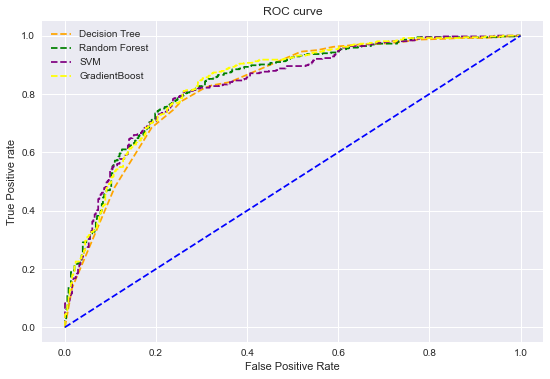

In [197]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='SVM')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='GradientBoost')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [198]:
pred_prob5 = gb1.predict_proba(test_x_ori)

In [199]:
y_test_pred_gb=gb1.predict(test_x_ori)

In [200]:
accuracy_gb = accuracy_score(test_y_ori, y_test_pred_gb)
recall_gb = recall_score(test_y_ori, y_test_pred_gb)
precision_gb = precision_score(test_y_ori, y_test_pred_gb)
f1_gb = f1_score(test_y_ori, y_test_pred_gb)
print("Accuracy of Decision Tree:", accuracy_gb)
print("Precision of Decision Tree:", precision_gb)
print("Recall of Decision Tree:", recall_gb)
print("F1 of Decision Tree:", f1_gb)

Accuracy of Decision Tree: 0.7740641711229946
Precision of Decision Tree: 0.7468354430379747
Recall of Decision Tree: 0.8104395604395604
F1 of Decision Tree: 0.7773386034255598


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



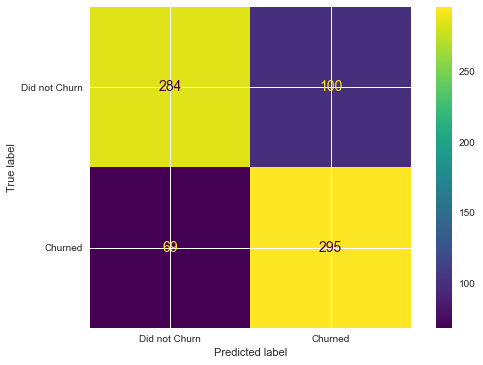

In [201]:
plot_confusion_matrix(gb1,
                       test_x_ori,
                       test_y_ori,
                       #values_format = 'd',
                       display_labels = ['Did not Churn', 'Churned'])

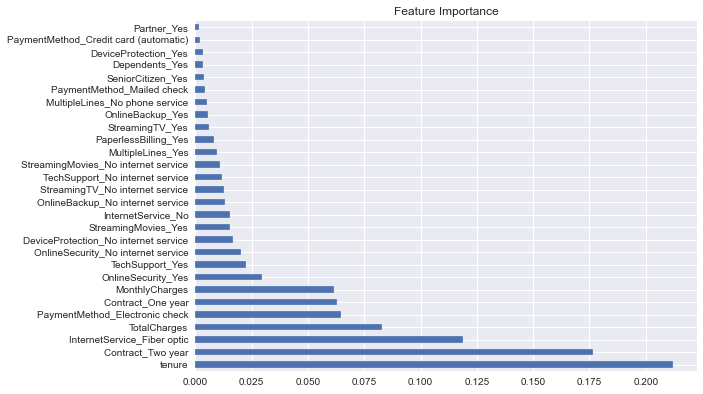

In [202]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(gb1.feature_importances_, index=train_x.columns).sort_values(ascending=False)

# Plot a simple bar chart
fig, ax = plt.subplots(figsize=(8,6))
feature_importances.plot.barh();
plt.title('Feature Importance')
plt.show()